
# **NewsSense: Applying AI to Classify News Articles**

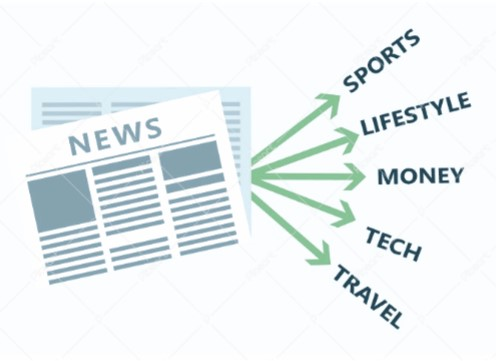

**Overview/Introduction:**
In our information-driven world, the enormous amount of news content can be overwhelming. This project tackles this challenge head-on, using artificial intelligence to sort news articles in a meaningful way. Our goal is to bring order to the vast sea of digital news. We're focusing on HuffPost, a well-known news provider, with the aim of categorizing a wide range of news headlines from the past decade.


**Problem Statement:**
The speed and volume of information available today is both a blessing and a curse. Although we have more access to news than ever before, the sheer amount of it can make finding the information we need a daunting task. It's hard for readers to find the stories they're interested in, and it's equally challenging for publishers to categorize content accurately. By using AI to classify news headlines, we can help readers find relevant content more easily, and help publishers deliver their content more effectively.


**Objectives:**
To create an AI tool that can accurately sort news articles based on their headlines and summaries.
To test our tool across different news categories to understand how well it works and where it can be improved.
To help make digital news easier to navigate, so readers can find the content they want more quickly and easily.


**Dataset Description:**
Our work is based on a comprehensive dataset from HuffPost that includes approximately 210,000 news headlines collected over ten years, from 2012 to 2022. Each record in this dataset includes not just the headline, but also other important details such as the news category, the names of the authors, the link to the original article, a brief summary of the article, and the date it was published.

The dataset includes 42 different news categories, showing the wide range of content provided by HuffPost. The 7 most common categories range from 'Politics' to 'Healthy Living'. The size and time span of this HuffPost dataset make it a rich resource for exploring how news content has evolved over time.

**Technologies Used**

- **Python**: A general-purpose programming language used to create the machine learning models.

- **Sklearn**: A Python library for machine learning which provides simple and efficient tools for data analysis and modeling.

- **TensorFlow**: An end-to-end open source platform for machine learning developed by Google Brain team.

- **TensorFlow Hub**: A library for the publication, discovery, and consumption of reusable parts of machine learning models.

- **Matplotlib**: A Python plotting library for creating static, animated, and interactive visualizations in Python.

- **NLTK (Natural Language Toolkit)**: Python library for working with human language data and performing natural language processing tasks.


**Methodology**

The approach taken for this project was supervised learning for text classification based on a labeled dataset. Different machine learning models were explored, including a Naive Bayes classifier, Conv1D, LSTM, Bidirectional LSTM, GRU, Bidirectional GRU, a simple dense network, and a model using the Universal Sentence Encoder (USE).



**Implementation**

In our model implementation, the first step involves preprocessing text data for Natural Language Processing (NLP). This includes functions to remove emojis, newline characters, lowercase text, URLs, mentions, non-UTF8/ASCII characters, punctuation, special characters, and multiple spaces. It also keeps relevant hashtags, removes common stop words, and applies lemmatization to reduce words to their base form, all to optimize text for subsequent stages.

The first model created was a baseline model using the Multinomial Naive Bayes classifier with TF-IDF vectorization. This model was evaluated using metrics such as accuracy, precision, recall, and F1-score.

Subsequently, different deep learning models including Conv1D, LSTM, Bidirectional LSTM, GRU, Bidirectional GRU, and a simple dense network were created and trained using the dataset. Callbacks were used to save the best model based on validation accuracy. Lastly, a model was developed using the Universal Sentence Encoder (USE) from TensorFlow Hub for creating the embedding layer. This model was also evaluated using the same metrics as before.



**Results**

The evaluation of each model was conducted using critical performance metrics such as accuracy, precision, recall, and F1-score. In this comparative analysis, the Bidirectional GRU model, utilizing advanced sequence processing and data encoding techniques, outstripped the other models in terms of the F1-score. The USE model, which employed more advanced embedding and classification techniques, secured the highest accuracy and came a close second in terms of the F1-score. A confusion matrix was employed to offer a vivid illustration of each model's performance.



**Discussion/Interpretation of Results**

The Bidirectional GRU model demonstrated superior performance across all metrics, confirming the robustness of recurrent network structures with bidirectional processing for text classification tasks. Notably, the USE model also exhibited a remarkable performance, securing the highest accuracy and nearly matching the Bidirectional GRU in the F1-score, underscoring the power of pre-trained embeddings for this task. Other deep learning models also displayed commendable performance, significantly outperforming the baseline model. The confusion matrix offered additional insights, highlighting the strengths and weaknesses in class prediction for each model.



**Conclusion**

The project demonstrated the application of various machine learning and deep learning techniques for text classification. The use of different architectures, from simple to complex ones like LSTM, GRU, and Universal Sentence Encoder (USE), highlighted the potential improvements that could be achieved with more sophisticated models.  We also learned how to evaluate the models using various metrics and visualizations. Future work could explore further improving these models through more data, better preprocessing, hyperparameter tuning, and experimentation with different architectures and techniques.

**Credits:**

1. Misra, Rishabh. "News Category Dataset." arXiv preprint arXiv:2209.11429 (2022).
2. Misra, Rishabh and Jigyasa Grover. "Sculpting Data for ML: The first act of Machine Learning." ISBN 9798585463570 (2021).
3. Daniel Bourke: https://github.com/mrdbourke

**Source of dataset**: rishabhmisra.github.io/publications

**Acknowledgements:**
The dataset was collected from HuffPost.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json


In [2]:
import io
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

We're starting with loading a JSON dataset, from Kaggle, into a pandas DataFrame. We'll check the shape of the data, any potential duplicates, and count any missing values.

In [4]:
PATH="/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json"

In [5]:
df = pd.read_json(PATH, lines=True)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


The following line drops the columns 'link', 'authors', and 'date' from the DataFrame df. The drop function is used with the axis=1 parameter to indicate that the operation is performed on columns.

In [7]:
df = df.drop(['link', 'authors','date'], axis=1)

A new column named 'text' is created in the DataFrame df. It combines the values from the 'headline' column and the 'short_description' column using the + operator. Then, the columns 'headline' and 'short_description' are dropped from the DataFrame df. The inplace=True parameter ensures that the DataFrame is modified directly.

In [8]:
df['text'] = df['headline'] + df['short_description']
df.drop(['headline','short_description'], inplace=True, axis=1)
df

,category,text
0,U.S. NEWS,Over 4 Million Americans Roll Up Sleeves For O...
1,U.S. NEWS,"American Airlines Flyer Charged, Banned For Li..."
2,COMEDY,23 Of The Funniest Tweets About Cats And Dogs ...
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
4,U.S. NEWS,Woman Who Called Cops On Black Bird-Watcher Lo...
...,...,...
209522,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...
209524,SPORTS,"Giants Over Patriots, Jets Over Colts Among M..."
209525,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...


We then calculate the count of each unique value in the 'category' column of the DataFrame df. This provides the frequency distribution of categories.

In [9]:
df['category'].value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

The following line creates a list of categories that should be retained in the DataFrame. Here, we take the top 7 highest value counts for df.category. The next line filters the DataFrame df to keep only the rows where the value in the 'category' column is present in the categories_to_keep list.

In [10]:
categories_to_keep = ["POLITICS", "WELLNESS", "ENTERTAINMENT", "TRAVEL", "STYLE & BEAUTY", "PARENTING", "HEALTHY LIVING"]
df = df[df['category'].isin(categories_to_keep)]
df

,category,text
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...
21,POLITICS,Biden Says U.S. Forces Would Defend Taiwan If ...
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...
...,...,...
209479,WELLNESS,This Is Only the Beginning: Surprising Advice ...
209480,STYLE & BEAUTY,"Cheryl Tiegs In A Sauna: A Look Back""A Look Ba..."
209481,PARENTING,Teen Responsibility Doesn't Happen -- It's Nur...
209512,ENTERTAINMENT,"Sundance, Ice-T, and Shades of the American Ra..."


Based on the value counts of df.category, we can see that the classes are not balanced. To make the classes more balanced, we randomly select 15,000 row indices from the part of the DataFrame df where the category is 'POLITICS' and stores them in the rows_to_remove variable. The next line drops the rows identified by the rows_to_remove indices from the DataFrame df, effectively removing a subset of rows related to the 'POLITICS' category.

In [11]:
# Randomly select 15000 row indices from the part of the DataFrame where category == "POLITICS"
rows_to_remove = df[df['category'] == 'POLITICS'].sample(15000, random_state=1).index

# Drop these rows
df = df.drop(rows_to_remove)
df

,category,text
3,PARENTING,The Funniest Tweets From Parents This Week (Se...
20,ENTERTAINMENT,Golden Globes Returning To NBC In January Afte...
24,POLITICS,‘Beautiful And Sad At The Same Time’: Ukrainia...
28,ENTERTAINMENT,James Cameron Says He 'Clashed' With Studio Be...
39,ENTERTAINMENT,Amazon Greenlights 'Blade Runner 2099' Limited...
...,...,...
209479,WELLNESS,This Is Only the Beginning: Surprising Advice ...
209480,STYLE & BEAUTY,"Cheryl Tiegs In A Sauna: A Look Back""A Look Ba..."
209481,PARENTING,Teen Responsibility Doesn't Happen -- It's Nur...
209512,ENTERTAINMENT,"Sundance, Ice-T, and Shades of the American Ra..."


The subsequent lines of code use the matplotlib library to create visualizations:

**Bar Chart**: Calculates and visualizes the frequency distribution of categories using matplotlib's plot function.

**Pie Char**t: Creates and displays a pie chart showing the percentage distribution of categories with labels and a legend.

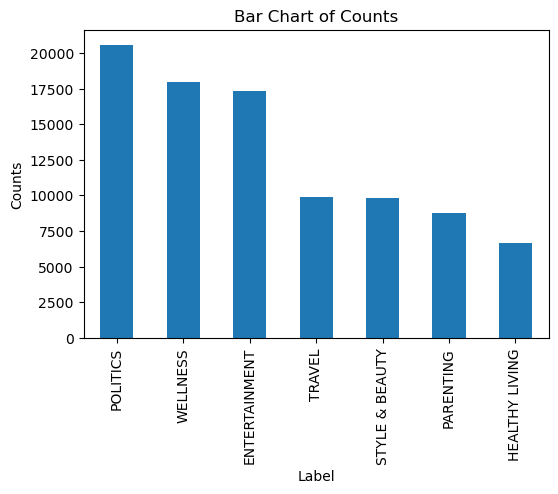

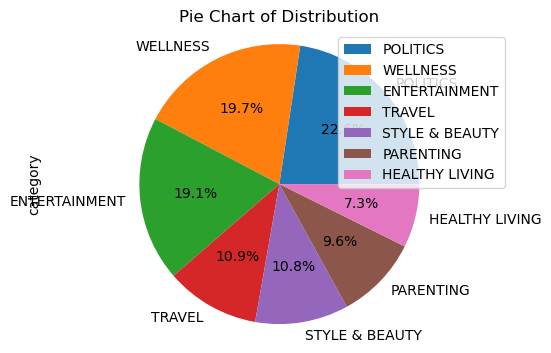

In [12]:
# Calculate the value counts of the 'category' column
category_counts = df['category'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Counts')
plt.title('Bar Chart of Counts')
plt.show()
print()

# Pie chart
plt.figure(figsize=(6, 4))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Pie Chart of Distribution')

# Add legend
plt.legend()

plt.show()

The following code prints the number of rows in the DataFrame df, indicating the total number of reviews in the dataset. It also checks for duplicate rows in the DataFrame df and prints the count of duplicate rows. It then calculates the number of missing values in each column of the DataFrame df and stores the result in the missing_values variable. Prints the number of missing values in each column of the DataFrame df. Calculates the total number of missing values in the DataFrame df and prints the result.

In [13]:
# How many reviews do we have?
print('There are', df.shape[0], 'data in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
missing_values = df.isnull().sum()
print('Number of Missing Values by column:\n',missing_values)

print('Number of Missing Values:', df.isnull().sum().sum())

There are 91108 data in this dataset
Number of Duplicates: 185
Number of Missing Values by column:
 category    0
text        0
dtype: int64
Number of Missing Values: 0


The following code replaces empty strings with NaN (missing values) in the DataFrame df using the replace function from the NumPy library. It then recalculates the number of missing values in each column of the DataFrame df after replacing empty strings with NaN. Finally, it prints the number of missing values and empty spaces (previously empty strings) in each column of the DataFrame df.

In [14]:
import numpy as np
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('Number of Missing Values and Empty Spaces by column:\n',missing_values)

Number of Missing Values and Empty Spaces by column:
 category    0
text        1
dtype: int64


The following code identifies duplicate rows in the DataFrame df by considering all columns. The parameter "keep=False" ensures that all duplicates are kept. The duplicate_rows DataFrame is then sorted on all columns to ensure that duplicate rows are adjacent to each other. 

In [15]:
# First, get all duplicate rows (keep=False ensures all duplicates are kept)
duplicate_rows = df[df.duplicated(keep=False)]

# Then sort the dataframe on all columns to ensure duplicates are adjacent
sorted_duplicates = duplicate_rows.sort_values(by=list(duplicate_rows.columns))

# Now, if we want to see 5 pairs of duplicates (10 rows), we can simply:
top_5_duplicate_pairs = sorted_duplicates.head(20)
top_5_duplicate_pairs

,category,text
101962,ENTERTAINMENT,Rihanna Soaks Up The Sun In A Bikini
110940,ENTERTAINMENT,Rihanna Soaks Up The Sun In A Bikini
64824,ENTERTAINMENT,This T. Rex Dominates 'American Ninja Warrior'...
64836,ENTERTAINMENT,This T. Rex Dominates 'American Ninja Warrior'...
121917,ENTERTAINMENT,What To Stream On Netflix This Month
124582,ENTERTAINMENT,What To Stream On Netflix This Month
18974,ENTERTAINMENT,"With This 'Shape Of Water' Clip, You'll Fall F..."
19009,ENTERTAINMENT,"With This 'Shape Of Water' Clip, You'll Fall F..."
105284,HEALTHY LIVING,Days of Inspiration for the New Year!
108762,HEALTHY LIVING,Days of Inspiration for the New Year!


The code removes duplicate rows from the DataFrame df using the drop_duplicates function. As a result, the DataFrame will only contain unique rows. After removing duplicates, it checks for any remaining duplicate rows in the DataFrame df and prints the count of those duplicates.

In [16]:
df = df.drop_duplicates()
print('Number of Duplicates:', len(df[df.duplicated()]))

Number of Duplicates: 0


The code drops rows with missing values (NaN) from the DataFrame df using the dropna function. The resulting DataFrame will only contain rows without any missing values. It then calculates the total number of missing values in the DataFrame df after removing rows with missing values and prints the result.

In [17]:
df = df.dropna()
print('Number of Missing Values:', df.isnull().sum().sum())

Number of Missing Values: 0


The code defines a function named random_sample_reviews that takes a DataFrame df and the number of samples to retrieve as parameters. It performs the following steps:

- Groups the reviews in the DataFrame df by their categories using groupby.
- Applies the sample function to each category's 'text' column to retrieve the specified number of samples.
- Converts the resulting series of samples to a DataFrame and resets the index.
- Drops the 'level_1' column (generated by resetting the index) from the DataFrame.
- Returns the resulting DataFrame containing the randomly sampled reviews.

The code then sets the display option to show a maximum of 200 characters for each column value in the DataFrame.

Finally, the function random_sample_reviews is called with the DataFrame df and num_samples=5 to retrieve a DataFrame of randomly sampled reviews.

In [18]:
def random_sample_reviews(df, num_samples):
    # Use groupby on 'category' and then apply the sample function to 'text' of each group
    samples = df.groupby('category')['text'].apply(lambda x: x.sample(num_samples))

    # Convert series to dataframe and reset index
    samples_df = samples.reset_index().drop(columns='level_1')

    return samples_df
pd.set_option('display.max_colwidth', 200) # This will display up to 200 characters
samples = random_sample_reviews(df, num_samples=5)
samples.head(20)

,category,text
0,ENTERTAINMENT,"James Corden Prods Jennifer Lopez To Dish On Alex Rodriguez Romance""Please don't do this."""
1,ENTERTAINMENT,2 Chiefs Players Isolated On COVID-19 List After Barber Tests PositiveKansas City receiver Demarcus Robinson and center Daniel Kilgore can't be with the team ahead of Sunday's Super Bowl because t...
2,ENTERTAINMENT,5 Netflix Shows To Watch If You Like ‘Game Of Thrones’Underrated similar shows to tide you over until Season 8.
3,ENTERTAINMENT,Listen To These 3 Songs Before Your Next Interview
4,ENTERTAINMENT,"'Fast 7' Will Use Body Doubles, CGI To Dub Missing Paul Walker ScenesThe puzzle of how Universal Pictures will piece together Paul Walker's ""Fast 7"" missing scenes has apparently been solved"
5,HEALTHY LIVING,"Let's Ban The Phrase 'Studies Show' From Medical LingoIf we've read evidence supporting our management decisions, let's own it by truly referring to the literature. But if we are only vaguely awar..."
6,HEALTHY LIVING,A Very Happy Re-Birthday
7,HEALTHY LIVING,Allow This Playlist To Push You Through A Fourth Of July WorkoutLet freedom (and your earbuds) ring.
8,HEALTHY LIVING,The Amazing Way This NFL Team Just Stepped Up For Mental HealthThis time with footwear.
9,HEALTHY LIVING,Take Some Time To Chill Out With These Blissful Yoga MovesYour stressful week has nothing on this sequence.


**Data Cleaning**

The following code defines several custom functions used for text cleaning.

- The `strip_emoji` function removes emojis from the text by using regular expressions to match various Unicode emoji patterns.

- The `strip_all_entities` function performs multiple cleaning tasks. It replaces newline characters (\r and \n) with spaces, converts the text to lowercase, removes URLs and mentions using regular expressions, and eliminates non-UTF8/ASCII characters. Additionally, it creates a banned list of punctuation and special characters, removes them from the text, and returns the cleaned text.

- The `clean_hashtags` function processes hashtags in the text. It removes hashtags at the end of the sentence, preserving those in the middle by removing only the '#' symbol.

- The `filter_chars` function filters out special characters such as '$' and '&' present in certain words. It splits the text into words, checks if any word contains these characters, and removes them if found.

- The `remove_mult_spaces` function removes multiple spaces in the text by replacing consecutive whitespace characters with a single space.

In [19]:
# Necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics

import re
import string

In [20]:
##CUSTOM DEFINED FUNCTIONS TO CLEAN THE TEXT

def strip_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(text):
    new_text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    new_text2 = " ".join(word.strip() for word in re.split('#|_', new_text)) #remove hashtags symbol from words in the middle of the sentence
    return new_text2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

Next code applies these custom functions to clean the 'text' column of the DataFrame 'df'. The 'strip_emoji', 'strip_all_entities', 'clean_hashtags', 'filter_chars', and 'remove_mult_spaces' functions are sequentially applied to each element of the 'text' column using the apply method. The cleaned text is stored in a new column named 'text1' in the same DataFrame.

In [21]:
df['text1'] = (df['text']
                     .apply(strip_emoji)
                     .apply(strip_all_entities)
                     .apply(clean_hashtags)
                     .apply(filter_chars)
                     .apply(remove_mult_spaces))

 The following code creates a DataFrame called 'df_comparison' to compare the original and cleaned text. It includes four columns: 'pre-clean text', 'pre-clean len' (length of the text before cleaning), 'post-clean text', and 'post-clean len' (length of the text after cleaning). The original text and its length are copied from the 'text' column of the original DataFrame 'df'. The cleaned text and its length are copied from the 'text1' column created in the previous step.

In [22]:
df_comparison = pd.DataFrame()

# Original text and its length
df_comparison['pre-clean text'] = df['text']
df_comparison['pre-clean len'] = df['text'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_comparison['post-clean text'] = df['text1']
df_comparison['post-clean len'] = df['text1'].apply(lambda x: len(str(x).split()))

df_comparison.head(10)

,pre-clean text,pre-clean len,post-clean text,post-clean len
3,"The Funniest Tweets From Parents This Week (Sept. 17-23)""Accidentally put grown-up toothpaste on my toddler’s toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped...",33,the funniest tweets from parents this week sept 1723accidentally put grownup toothpaste on my toddlers toothbrush and he screamed like i was cleaning his teeth with a carolina reaper dipped in tab...,33
20,"Golden Globes Returning To NBC In January After Year Off-AirFor the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journali...",34,golden globes returning to nbc in january after year offairfor the past 18 months hollywood has effectively boycotted the globes after reports that the hfpas 87 members of nonamerican journalists ...,34
24,‘Beautiful And Sad At The Same Time’: Ukrainian Cultural Festival Takes On A Deeper Meaning This YearAn annual celebration took on a different feel as Russia's invasion dragged into Day 206.,31,beautiful and sad at the same time ukrainian cultural festival takes on a deeper meaning this yearan annual celebration took on a different feel as russias invasion dragged into day 206,31
28,"James Cameron Says He 'Clashed' With Studio Before 'Avatar' ReleaseThe ""Avatar"" director said aspects of his 2009 movie are ""still competitive with everything that’s out there these days.""",28,james cameron says he clashed with studio before avatar releasethe avatar director said aspects of his 2009 movie are still competitive with everything thats out there these days,28
39,Amazon Greenlights 'Blade Runner 2099' Limited Series Produced By Ridley ScottThe director of the original 1982 film joins a writer of the 2017 sequel for the newest installment in the sci-fi fran...,32,amazon greenlights blade runner 2099 limited series produced by ridley scottthe director of the original 1982 film joins a writer of the 2017 sequel for the newest installment in the scifi franchise,32
40,Bill To Help Afghans Who Escaped Taliban Faces Long Odds In The SenateRepublican outrage over the shoddy U.S. withdrawal from Afghanistan hasn’t spurred support for resettling refugees.,27,bill to help afghans who escaped taliban faces long odds in the senaterepublican outrage over the shoddy us withdrawal from afghanistan hasnt spurred support for resettling refugees,27
43,"'The Phantom Of The Opera' To Close On Broadway Next Year“The Phantom of the Opera” — Broadway’s longest-running show — is scheduled to close in February 2023, a victim of post-pandemic softening ...",38,the phantom of the opera to close on broadway next yearthe phantom of the opera broadways longestrunning show is scheduled to close in february 2023 a victim of postpandemic softening in theater a...,36
44,"Mark Meadows Complies With Justice Dept. Subpoena: ReportThe former White House chief of staff has turned over records as part of a federal investigation into the Jan. 6, 2021 assault on the Capitol.",33,mark meadows complies with justice dept subpoena reportthe former white house chief of staff has turned over records as part of a federal investigation into the jan 6 2021 assault on the capitol,33
47,Viola Davis Feared A Heart Attack During 'The Woman King' TrainingThe Oscar winner said she worked out for five hours a day for her role in the new action movie.,30,viola davis feared a heart attack during the woman king trainingthe oscar winner said she worked out for five hours a day for her role in the new action movie,30
48,"Kim Kardashian's Next Boyfriend Could Be A BiochemistThe reality star told James Corden she's branching out because ""clearly it's not working, whatever I’m doing.""",24,kim kardashians next boyfriend could be a biochemistthe reality star told james corden shes branching out because clearly its not working whatever im doing,24


The following block of code defines the function 'remove_stopwords' to remove stopwords from a sentence. Stopwords are common words that often do not contribute much meaning to the text. The function takes a sentence as input, converts it to lowercase, splits it into words, removes any stopwords, and returns the modified sentence.

In [23]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords

    Args:
        sentence (string): sentence to remove the stopwords from

    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence


Then, we apply the 'remove_stopwords' function to the 'text1' column of the DataFrame 'df'. The function is applied to each element of the column using the apply method, and the cleaned text is stored in a new column named 'text2' in the same DataFrame.

In [24]:
df['text2'] = (df['text1'].apply(remove_stopwords))

Just as seen done previously, the following block of code creates a DataFrame called 'df_comp' to compare the text before and after removing stopwords. It includes four columns: 'pre-clean text', 'pre-clean len' (length of the text before cleaning), 'post-clean text', and 'post-clean len' (length of the text after cleaning). The original text and its length are copied from the 'text1' column. The cleaned text and its length (after removing stopwords) are copied from the 'text2' column.

In [25]:
df_comp = pd.DataFrame()

# Original text and its length
df_comp['pre-clean text'] = df['text1']
df_comp['pre-clean len'] = df['text1'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_comp['post-clean text'] = df['text2']
df_comp['post-clean len'] = df['text2'].apply(lambda x: len(str(x).split()))

df_comp.head(10)

,pre-clean text,pre-clean len,post-clean text,post-clean len
3,the funniest tweets from parents this week sept 1723accidentally put grownup toothpaste on my toddlers toothbrush and he screamed like i was cleaning his teeth with a carolina reaper dipped in tab...,33,funniest tweets parents week sept 1723accidentally put grownup toothpaste toddlers toothbrush screamed like cleaning teeth carolina reaper dipped tabasco sauce,20
20,golden globes returning to nbc in january after year offairfor the past 18 months hollywood has effectively boycotted the globes after reports that the hfpas 87 members of nonamerican journalists ...,34,golden globes returning nbc january year offairfor past 18 months hollywood effectively boycotted globes reports hfpas 87 members nonamerican journalists included no black members,24
24,beautiful and sad at the same time ukrainian cultural festival takes on a deeper meaning this yearan annual celebration took on a different feel as russias invasion dragged into day 206,31,beautiful sad time ukrainian cultural festival takes deeper meaning yearan annual celebration took different feel russias invasion dragged day 206,20
28,james cameron says he clashed with studio before avatar releasethe avatar director said aspects of his 2009 movie are still competitive with everything thats out there these days,28,james cameron says clashed studio avatar releasethe avatar director said aspects 2009 movie still competitive everything thats days,18
39,amazon greenlights blade runner 2099 limited series produced by ridley scottthe director of the original 1982 film joins a writer of the 2017 sequel for the newest installment in the scifi franchise,32,amazon greenlights blade runner 2099 limited series produced ridley scottthe director original 1982 film joins writer 2017 sequel newest installment scifi franchise,22
40,bill to help afghans who escaped taliban faces long odds in the senaterepublican outrage over the shoddy us withdrawal from afghanistan hasnt spurred support for resettling refugees,27,bill help afghans escaped taliban faces long odds senaterepublican outrage shoddy us withdrawal afghanistan hasnt spurred support resettling refugees,19
43,the phantom of the opera to close on broadway next yearthe phantom of the opera broadways longestrunning show is scheduled to close in february 2023 a victim of postpandemic softening in theater a...,36,phantom opera close broadway next yearthe phantom opera broadways longestrunning show scheduled close february 2023 victim postpandemic softening theater attendance new york,22
44,mark meadows complies with justice dept subpoena reportthe former white house chief of staff has turned over records as part of a federal investigation into the jan 6 2021 assault on the capitol,33,mark meadows complies justice dept subpoena reportthe former white house chief staff turned records part federal investigation jan 6 2021 assault capitol,22
47,viola davis feared a heart attack during the woman king trainingthe oscar winner said she worked out for five hours a day for her role in the new action movie,30,viola davis feared heart attack woman king trainingthe oscar winner said worked five hours day role new action movie,19
48,kim kardashians next boyfriend could be a biochemistthe reality star told james corden shes branching out because clearly its not working whatever im doing,24,kim kardashians next boyfriend biochemistthe reality star told james corden shes branching clearly not working whatever im,17


The following code involves importing necessary NLTK resources and defining the 'lemmatize_text' function. The code unzips the WordNet corpus and downloads additional NLTK resources, including the WordNet and Punkt datasets. The function uses the WordNetLemmatizer from NLTK to lemmatize the words in a sentence. Lemmatization is the process of converting a word to its base form. For example, "running" becomes "run", "better" becomes "good", etc. It tokenizes the sentence into words, applies lemmatization to each word, and then joins the lemmatized words back into a sentence.

In [26]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

import nltk
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize the sentence
    word_list = nltk.word_tokenize(text)

    # Lemmatize list of words and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])

    return lemmatized_output

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


The 'lemmatize_text' function is then applied to the 'text2' column of the DataFrame 'df'. The function is applied to each element of the column using the apply method, and the lemmatized text is stored in a new column named 'text3' in the same DataFrame.

In [27]:
df['text3'] = df['text2'].apply(lemmatize_text)

Now, a DataFrame named 'df_lemma' is created to compare the text before and after lemmatization. It includes four columns: 'pre-clean text', 'pre-clean len' (length of the text before cleaning), 'post-clean text', and 'post-clean len' (length of the text after cleaning). The original text and its length are copied from the 'text2' column. The lemmatized text and its length are copied from the 'text3' column.

In [28]:
df_lemma = pd.DataFrame()

# Original text and its length
df_lemma['pre-clean text'] = df['text2']
df_lemma['pre-clean len'] = df['text2'].apply(lambda x: len(str(x).split()))

# Cleaned text and its length
df_lemma['post-clean text'] = df['text3']
df_lemma['post-clean len'] = df['text3'].apply(lambda x: len(str(x).split()))

df_lemma.head(10)

,pre-clean text,pre-clean len,post-clean text,post-clean len
3,funniest tweets parents week sept 1723accidentally put grownup toothpaste toddlers toothbrush screamed like cleaning teeth carolina reaper dipped tabasco sauce,20,funniest tweet parent week sept 1723accidentally put grownup toothpaste toddler toothbrush screamed like cleaning teeth carolina reaper dipped tabasco sauce,20
20,golden globes returning nbc january year offairfor past 18 months hollywood effectively boycotted globes reports hfpas 87 members nonamerican journalists included no black members,24,golden globe returning nbc january year offairfor past 18 month hollywood effectively boycotted globe report hfpas 87 member nonamerican journalist included no black member,24
24,beautiful sad time ukrainian cultural festival takes deeper meaning yearan annual celebration took different feel russias invasion dragged day 206,20,beautiful sad time ukrainian cultural festival take deeper meaning yearan annual celebration took different feel russia invasion dragged day 206,20
28,james cameron says clashed studio avatar releasethe avatar director said aspects 2009 movie still competitive everything thats days,18,james cameron say clashed studio avatar releasethe avatar director said aspect 2009 movie still competitive everything thats day,18
39,amazon greenlights blade runner 2099 limited series produced ridley scottthe director original 1982 film joins writer 2017 sequel newest installment scifi franchise,22,amazon greenlights blade runner 2099 limited series produced ridley scottthe director original 1982 film join writer 2017 sequel newest installment scifi franchise,22
40,bill help afghans escaped taliban faces long odds senaterepublican outrage shoddy us withdrawal afghanistan hasnt spurred support resettling refugees,19,bill help afghan escaped taliban face long odds senaterepublican outrage shoddy u withdrawal afghanistan hasnt spurred support resettling refugee,19
43,phantom opera close broadway next yearthe phantom opera broadways longestrunning show scheduled close february 2023 victim postpandemic softening theater attendance new york,22,phantom opera close broadway next yearthe phantom opera broadway longestrunning show scheduled close february 2023 victim postpandemic softening theater attendance new york,22
44,mark meadows complies justice dept subpoena reportthe former white house chief staff turned records part federal investigation jan 6 2021 assault capitol,22,mark meadow complies justice dept subpoena reportthe former white house chief staff turned record part federal investigation jan 6 2021 assault capitol,22
47,viola davis feared heart attack woman king trainingthe oscar winner said worked five hours day role new action movie,19,viola davis feared heart attack woman king trainingthe oscar winner said worked five hour day role new action movie,19
48,kim kardashians next boyfriend biochemistthe reality star told james corden shes branching clearly not working whatever im,17,kim kardashians next boyfriend biochemistthe reality star told james corden shes branching clearly not working whatever im,17


The next code drops the columns 'text', 'text1', and 'text2' from the DataFrame 'df'. This is done using the 'drop' function with an axis of 1, removing these columns from the DataFrame.

In [29]:
df = df.drop(['text', 'text1', 'text2'], axis=1)

In the subsequent code, the rows of the DataFrame 'df' are shuffled to randomize the order of the data. The 'sample' function is used with a fraction of 1, which means all rows, and a random state of 42 is set for reproducibility.

In [30]:
# Shuffle training dataframe
df = df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
df.head()

,category,text3
134322,PARENTING,younger teen still make 1 4 teen mother report saysthe number 15 17yearolds give birth declined younger teen still account onequarter
41323,ENTERTAINMENT,manchester sea director defends casey affleck college paperthe piece published wesleyan university newspaper student wrote oped critical affleck lonergan
165209,TRAVEL,outdoor dining best al fresco restaurant new york city photosthe best spot grub outdoors summer
59672,ENTERTAINMENT,paul mccartney admits beatles felt threatened yoko onolet known
103529,HEALTHY LIVING,ask jj maintaining steady sustained energymany issue underlie ourcaffeinated constantly tired modernday energy crisis ive found addressing five thing can make difference crashing steady sustained ...


Now, the DataFrame 'df' is converted into a CSV file named 'df_output.csv'. The 'to_csv' function is used with the 'index' parameter set to False to exclude the row index from the CSV file.

In [31]:
# Convert the DataFrame to a CSV file
df.to_csv('df_output.csv', index=False)

The next block of code opens and reads the CSV file 'df_output.csv'. It prints the first line, which represents the header, and the second line, representing a single data point.

In [32]:
with open("/kaggle/working/df_output.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

category,text3

Each data point looks like this:

PARENTING,younger teen still make 1 4 teen mother report saysthe number 15 17yearolds give birth declined younger teen still account onequarter



The subsequent block of code defines a function called 'parse_data_from_file' that extracts sentences and labels from a CSV file. The function takes a filename as input, opens the file, and reads the data using the csv.reader. It stores the sentences in a list called 'sentences' and the labels in a list called 'labels', and then returns these two lists.

In [33]:
def parse_data_from_file(filename):
    """
    Extracts sentences and labels from a CSV file

    Args:
        filename (string): path to the CSV file

    Returns:
        sentences, labels (list of string, list of string): tuple containing lists of sentences and labels
    """
    sentences = []
    labels = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[0])
            sentences.append(row[1])
    return sentences, labels

The next block of code applies the 'parse_data_from_file' function to extract sentences and labels from the 'df_output.csv' file. The sentences are stored in the 'sentences' variable, and the labels are stored in the 'labels' variable. Several print statements provide information about the original dataset, such as the number of sentences, the length of the first sentence, the number of labels, and the first 10 labels.

In [34]:
# With original dataset
sentences, labels = parse_data_from_file("/kaggle/working/df_output.csv")

print("ORIGINAL DATASET:\n")
print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words.\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 10 labels are {labels[:10]}\n\n")

ORIGINAL DATASET:

There are 90922 sentences in the dataset.

First sentence has 21 words.

There are 90922 labels in the dataset.

The first 10 labels are ['PARENTING', 'ENTERTAINMENT', 'TRAVEL', 'ENTERTAINMENT', 'HEALTHY LIVING', 'ENTERTAINMENT', 'POLITICS', 'POLITICS', 'HEALTHY LIVING', 'WELLNESS']




The following prints the first two sentences and labels from the 'sentences' and 'labels' lists.

In [35]:
sentences[:2], labels[:2]

(['younger teen still make 1 4 teen mother report saysthe number 15 17yearolds give birth declined younger teen still account onequarter',
  'manchester sea director defends casey affleck college paperthe piece published wesleyan university newspaper student wrote oped critical affleck lonergan'],
 ['PARENTING', 'ENTERTAINMENT'])

The 'np.unique' function is used here to find the unique labels in the 'labels' list. The resulting array contains the unique labels sorted in order.

In [36]:
np.unique(labels)

array(['ENTERTAINMENT', 'HEALTHY LIVING', 'PARENTING', 'POLITICS',
       'STYLE & BEAUTY', 'TRAVEL', 'WELLNESS'], dtype='<U14')

Next, we calculate the number of classes (unique labels) by taking the length of the array obtained from 'np.unique'.

In [37]:
num_classes=len(np.unique(labels))
num_classes

7

**Label Encoding**

Now, we will implement Label Encoding on our labels using the LabelEncoder class. The LabelEncoder is a class from the scikit-learn library that is used for encoding categorical labels into numerical values. It transforms the categorical labels into integers, assigning a unique numerical value to each unique label.

The following block of code shows the implementation of label encoding. LabelEncoder class from scikit-learn is first imported, and an instance of the LabelEncoder object called 'le' is created.

Then, we use the 'fit_transform' method of the LabelEncoder object 'le' to fit and transform the 'labels' list. The labels are encoded and stored in the 'encoded_labels' variable.

In [38]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the labels
encoded_labels = le.fit_transform(labels)

# Mapping of labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
encoded_labels

array([2, 0, 5, ..., 6, 0, 1])

Now, a DataFrame named 'dr' is created using pandas. It has two columns: 'Label' and 'Label Encoded'. The 'Label' column contains the original labels, while the 'Label Encoded' column contains the corresponding encoded labels.

In [39]:
# Define data
data = {
    'Label': list(label_mapping.keys()),
    'Label Encoded': list(label_mapping.values())
}

# Create DataFrame
dr = pd.DataFrame(data)

# Print DataFrame
dr

,Label,Label Encoded
0,ENTERTAINMENT,0
1,HEALTHY LIVING,1
2,PARENTING,2
3,POLITICS,3
4,STYLE & BEAUTY,4
5,TRAVEL,5
6,WELLNESS,6


 The 'class_names' variable is assigned as the values from the 'Label' column of the DataFrame 'dr'. It creates a list of class names based on the labels in the dataset.

In [40]:
class_names=dr.Label.tolist()
class_names

['ENTERTAINMENT',
 'HEALTHY LIVING',
 'PARENTING',
 'POLITICS',
 'STYLE & BEAUTY',
 'TRAVEL',
 'WELLNESS']

 Next, several constants are set up for use in the following operations. `NUM_WORDS` represents the number of words to keep based on the frequency of words when tokenizing text. `EMBEDDING_DIM` defines the size of word vectors for embedding layers in the model. The `PADDING` constant will define how padding will be added to the text sequences, in this case, padding will be added to the end of the sequences ('post'). `OOV_TOKEN` stands for "Out of Vocabulary Token", this will be used for words that aren't in the word index when converting text into tokens. The `TRAINING_SPLIT` represents the proportion of the data to be used for training, with the remaining being used for validation/testing.

In [41]:
NUM_WORDS = 10000
EMBEDDING_DIM = 16
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

Now, a function train_val_split is defined to split the provided sentences and corresponding labels into training and validation sets. The training_split is used to determine the proportion of the data to be used for training. The function returns the training and validation data for both sentences and labels.

In [42]:
def train_val_split(sentences, labels, training_split):
    """
    Splits the dataset into training and validation sets

    Args:
        sentences (list of string): lower-cased sentences without stopwords
        labels (list of string): list of labels
        training split (float): proportion of the dataset to convert to include in the train set

    Returns:
        train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
    """

    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences) * training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    return train_sentences, validation_sentences, train_labels, validation_labels

Subsequently, this function is used to split the data into training and validation sets. Some diagnostic print statements are included to confirm the size of these splits.

In [43]:
# train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, encoded_labels, TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 72737 sentences for training.

There are 72737 labels for training.

There are 18185 sentences for validation.

There are 18185 labels for validation.


In [44]:
train_labels

array([2, 0, 5, ..., 5, 6, 0])

Following that, the 98th percentile of the text lengths in the training data is calculated and set as MAXLEN. This value will be used to pad and truncate sequences ensuring that they are all the same length.

In [45]:
# Calculate the length of each text in train_sentences
text_lengths = [len(text.split()) for text in train_sentences]

# Find the 98th percentile
percentile_98 = np.percentile(text_lengths, 98)

print(f"98th Percentile of Text Lengths: {percentile_98}")

98th Percentile of Text Lengths: 35.0


In [46]:
MAXLEN= int(percentile_98)

The distribution of the text lengths is visualized using a histogram. The 98th percentile is marked with a red vertical line for reference.

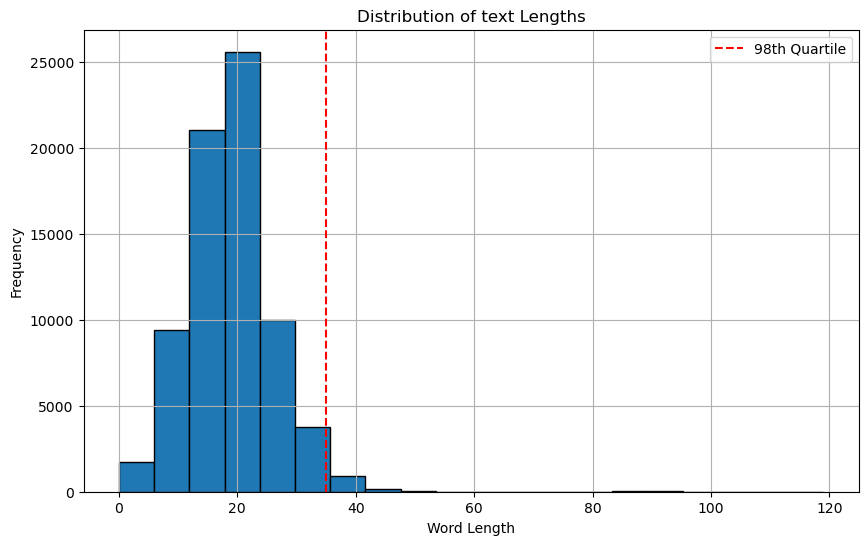

In [47]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=20, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of text Lengths')

# Adding a vertical line for the 98th quartile
percentile_98 = np.percentile(text_lengths, 98)
plt.axvline(x=percentile_98, color='red', linestyle='--', label='98th Quartile')
plt.legend()

plt.grid(True)
plt.show()

The maximum text length is calculated and printed out. This may be useful in understanding the range of text lengths in the data set.

In [48]:
max_text_length = max(text_lengths)
print(f"Maximum Text Length: {max_text_length}")

Maximum Text Length: 119


The fit_tokenizer function is now defined to fit a Tokenizer to the training sentences, taking a list of sentences and the maximum number of words to keep based on word frequency (num_words) as arguments. It returns a Tokenizer instance.

In [49]:
def fit_tokenizer(train_sentences, num_words):
    """
    Instantiates the Tokenizer class on the training sentences

    Args:
        train_sentences (list of string): lower-cased sentences without stopwords to be used for training
        num_words (int) - number of words to keep when tokenizing
        oov_token (string) - symbol for the out-of-vocabulary token

    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """

    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)

    return tokenizer

Next, this function is used to fit a tokenizer to the training sentences and the word index is extracted. A word index is a dictionary mapping words to their corresponding numerical identifier.

In [50]:
tokenizer = fit_tokenizer(train_sentences, NUM_WORDS)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 109749 words

<OOV> token included in vocabulary


In the following block of code, a function seq_and_pad is defined to convert sentences to sequences of integers (tokens) and pad these sequences so they are all the same length.

In [51]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    """
    Generates an array of token sequences and pads them to the same length

    Args:
        sentences (list of string): list of sentences to tokenize and pad
        tokenizer (object): Tokenizer instance containing the word-index dictionary
        padding (string): type of padding to use
        maxlen (int): maximum length of the token sequence

    Returns:
        padded_sequences (array of int): tokenized sentences padded to the same length
    """

    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)

    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, padding=padding, maxlen=maxlen)

    return padded_sequences

Then, this function is applied to the training and validation sentences to prepare them for input to a model. The shape of the resulting sequences is printed out for confirmation.

In [52]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (72737, 35)

Padded validation sequences have shape: (18185, 35)


The (label encoded) labels are copied to be used later.

In [53]:
train_labels_le = train_labels.copy()
val_labels_le = val_labels.copy()

In [54]:
train_labels_le, val_labels_le

(array([2, 0, 5, ..., 5, 6, 0]), array([4, 5, 5, ..., 6, 0, 1]))

Subsequently, an instance of the OneHotEncoder class is created and used to one-hot encode the labels. One-hot encoding transforms categorical data into binary vectors for better compatibility with machine learning algorithms. This technique is preferred because it represents categories numerically without implying an ordered relationship, which can mislead models.

In [55]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

train_labels = one_hot_encoder.fit_transform(np.array(train_labels).reshape(-1, 1))
val_labels = one_hot_encoder.transform(np.array(val_labels).reshape(-1, 1))

# Check what training labels look like
train_labels.shape, val_labels.shape

((72737, 7), (18185, 7))

In [56]:
train_labels, val_labels

(array([[0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]))

In this project, both label and one-hot encoding are used because different models, like Naive Bayes and neural networks, have distinct data format preferences. Naive Bayes can handle label encoded numerical data efficiently, while neural networks work better with one-hot encoded data due to their mathematical operations which could misinterpret the order in label encoded data.

Therefore, to maximize different models' strengths, data is prepared in both formats, enabling flexible usage depending on the model's requirement.

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Model: Baseline**

Next, a simple baseline model is defined using a TF-IDF vectorizer and a multinomial Naive Bayes classifier within a Scikit-Learn pipeline. The model is then trained on the training data.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Now fit the model
model_0.fit(train_sentences, train_labels_le)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

The accuracy of the baseline model is then evaluated on the validation data and printed out.

In [58]:
baseline_score = model_0.score(val_sentences, val_labels_le)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 71.52%


Now, predictions are made using the baseline model on the validation sentences.

In [59]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([4, 5, 0, 4, 6, 3, 3, 4, 0, 6, 6, 5, 5, 6, 6, 3, 0, 0, 3, 3])

Then a function calculate_results is defined to calculate the accuracy, precision, recall, and F1 score of the model's predictions.

In [60]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

The function is used to calculate the results of the baseline model and these are printed out.

In [61]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels_le,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 71.52048391531483,
 'precision': 0.7993744795019643,
 'recall': 0.7152048391531483,
 'f1': 0.6728906871136605}

A helper function compare_baseline_to_new_results is defined to compare the results of the baseline model to a new model. It does this by calculating the difference between the baseline and new results for each metric.

In [62]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

**Callbacks**

We now define a function that creates a ModelCheckpoint callback for TensorFlow. This callback saves the model's weights at various points during training, specifically when validation accuracy improves. This allows for recovery and use of the best performing model, even if training was interrupted or fully trained for more iterations.

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint

def create_checkpoint_callback(checkpoint_path):
    """
    This function returns a ModelCheckpoint callback that saves the model's weights only when the
    validation accuracy improves.

    Parameters:
    checkpoint_path (str): The filepath where the model weights should be saved.

    Returns:
    ModelCheckpoint callback
    """
    checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                          monitor='val_accuracy',
                                          mode='max',
                                          save_best_only=True,
                                          verbose=1)
    return checkpoint_callback


**Embedding layer**

In [64]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers

 Here an embedding layer is set up, converting input words into dense vectors of fixed size. This representation captures semantic relationships between words. `tf.random.set_seed(42)` ensures reproducibility by fixing the randomness.

In [65]:
# from tensorflow.keras import layers

tf.random.set_seed(42)

embedding = layers.Embedding(input_dim=NUM_WORDS, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=MAXLEN, # how long is each input
                             name="embedding_1")

embedding

**Model: Simple Dense**

This code block builds our first neural network model for text classification. The `GlobalAveragePooling1D` layer is used to reduce the dimensionality of the input, which helps model performance by condensing information.

In [66]:
# Build model with the Functional API
from tensorflow.keras import layers

inputs = layers.Input(shape=(train_padded_seq.shape[1],), dtype="int32") # inputs are 1-dimensional integer
x = embedding(inputs) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(num_classes, activation="softmax")(x) # create the output layer
model_dense = tf.keras.Model(inputs, outputs, name="model_dense") # construct the model

The model is compiled with the Adam optimizer and categorical cross-entropy as the loss function, appropriate for multiclass classification tasks.

In [67]:
# Compile model
model_dense.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [68]:
# Get a summary of the model
model_dense.summary()

Model: "model_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 35, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 7)                 903       
                                                                 
Total params: 1,280,903
Trainable params: 1,280,903
Non-trainable params: 0
_________________________________________________________________


Now, we create an instance of the ModelCheckpoint callback.

In [69]:
# Define the checkpoint path
checkpoint_path = "best_model_dense"

cc = create_checkpoint_callback(checkpoint_path)

The model is trained on train_padded_seq and train_labels, with validation data provided, and the checkpoint callback.

In [70]:
# Fit the model
model_dense_history = model_dense.fit(train_padded_seq, 
                              train_labels,
                              epochs=20,
                              validation_data=(val_padded_seq, val_labels),
                              callbacks=[cc])

Epoch 1/20
2274/2274 [==============================] - ETA: 0s - loss: 0.9656 - accuracy: 0.6972
Epoch 1: val_accuracy improved from -inf to 0.81094, saving model to best_model_dense
2274/2274 [==============================] - 44s 18ms/step - loss: 0.9656 - accuracy: 0.6972 - val_loss: 0.6178 - val_accuracy: 0.8109
Epoch 2/20
2274/2274 [==============================] - ETA: 0s - loss: 0.5240 - accuracy: 0.8374
Epoch 2: val_accuracy improved from 0.81094 to 0.81826, saving model to best_model_dense
2274/2274 [==============================] - 13s 6ms/step - loss: 0.5240 - accuracy: 0.8374 - val_loss: 0.5743 - val_accuracy: 0.8183
Epoch 3/20
2274/2274 [==============================] - ETA: 0s - loss: 0.4376 - accuracy: 0.8621
Epoch 3: val_accuracy did not improve from 0.81826
2274/2274 [==============================] - 11s 5ms/step - loss: 0.4376 - accuracy: 0.8621 - val_loss: 0.5756 - val_accuracy: 0.8177
Epoch 4/20
2271/2274 [============================>.] - ETA: 0s - loss: 0.383

After training, the history of model accuracy and loss is plotted over epochs.

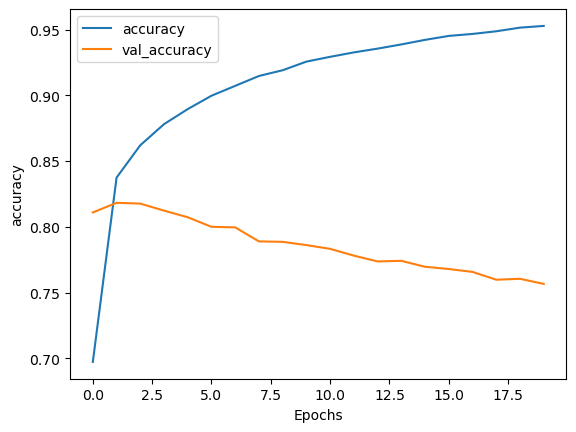

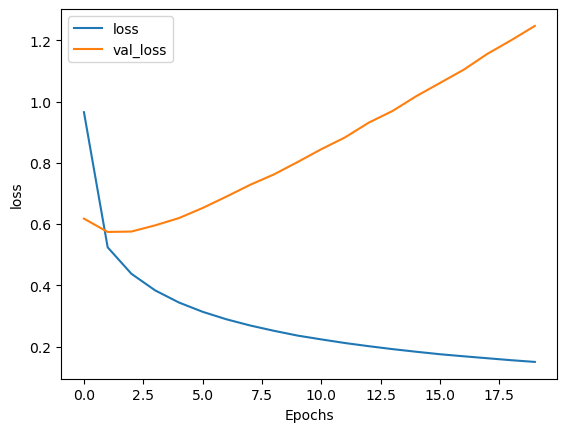

In [71]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_dense_history, 'accuracy')
plot_graphs(model_dense_history, 'loss')

 The best model (as determined by validation accuracy) is loaded.

In [72]:
from tensorflow.keras.models import load_model

# Load the entire model
model_dense = load_model(checkpoint_path)

The model is evaluated on the validation set.

In [73]:
# Check the results
model_dense.evaluate(val_padded_seq, val_labels)

569/569 [==============================] - 1s 2ms/step - loss: 0.5743 - accuracy: 0.8183


[0.5743210315704346, 0.8182567954063416]

Probabilities are predicted on the validation set and then converted into class predictions.

In [74]:
# Make predictions (these come back in the form of probabilities)
model_dense_pred_probs = model_dense.predict(val_padded_seq)
model_dense_pred_probs[:10] # only print out the first 10 prediction probabilities

569/569 [==============================] - 1s 1ms/step


array([[7.03137903e-06, 2.16826209e-07, 4.29572492e-06, 6.40100737e-08,
        9.99977946e-01, 9.75146850e-06, 6.80205687e-07],
       [8.88115319e-05, 2.19103252e-03, 5.52199082e-04, 1.55100770e-05,
        1.04811066e-03, 9.91830766e-01, 4.27347422e-03],
       [5.40255785e-01, 4.96746711e-02, 2.58418340e-02, 1.34055987e-01,
        2.73419898e-02, 6.61790743e-02, 1.56650633e-01],
       [2.29776022e-03, 1.31396679e-04, 3.93712311e-04, 4.36583301e-03,
        9.86156344e-01, 6.35780813e-03, 2.97129300e-04],
       [1.00634588e-06, 6.04316639e-03, 1.47933577e-04, 1.89957177e-06,
        1.92757830e-06, 8.20305941e-05, 9.93722022e-01],
       [1.69356543e-04, 1.41834162e-05, 1.65154700e-06, 9.99805272e-01,
        2.45530305e-06, 9.41991914e-07, 6.10432608e-06],
       [2.85947800e-01, 1.42425641e-01, 5.14140539e-02, 3.08963060e-01,
        2.36937795e-02, 8.08059946e-02, 1.06749654e-01],
       [1.12654711e-03, 2.81716420e-05, 1.55504793e-03, 4.19365506e-06,
        9.97050881e-01, 7

In [75]:
# Convert pred probs to classes
model_dense_preds = tf.argmax(model_dense_pred_probs, axis=1)
model_dense_preds

<tf.Tensor: shape=(18185,), dtype=int64, numpy=array([4, 5, 0, ..., 6, 0, 1])>

Various metrics like accuracy, precision, recall, and F1-score are calculated for model performance evaluation.

In [76]:
# Calculate model_dense metrics
model_dense_results = calculate_results(y_true=val_labels_le,
                                    y_pred=model_dense_preds)
model_dense_results

{'accuracy': 81.82568050591146,
 'precision': 0.8176387298390758,
 'recall': 0.8182568050591147,
 'f1': 0.8144390402808871}

In [77]:
y_true = np.argmax(val_labels, axis=1).tolist()  # Convert one-hot encoded labels to class labels
preds = model_dense.predict(val_padded_seq)
y_probs = preds.tolist()  # Store the prediction probabilities
y_preds = np.argmax(preds, axis=1).tolist()  # Convert probabilities to class predictions

569/569 [==============================] - 1s 1ms/step


A confusion matrix is generated to visualize the performance of the classification model. The matrix is then made more readable through a custom function.

In [78]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[3097,   36,   70,  133,   50,   54,   68],
       [  71,  530,   54,   69,    6,   18,  601],
       [  76,   40, 1333,   33,   35,   31,  223],
       [ 219,   54,   26, 3695,   11,   71,   97],
       [ 128,   12,   41,   20, 1574,   43,   89],
       [  77,   27,   24,   42,   26, 1583,  101],
       [  65,  147,  153,   59,   27,   78, 3068]])

In [79]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

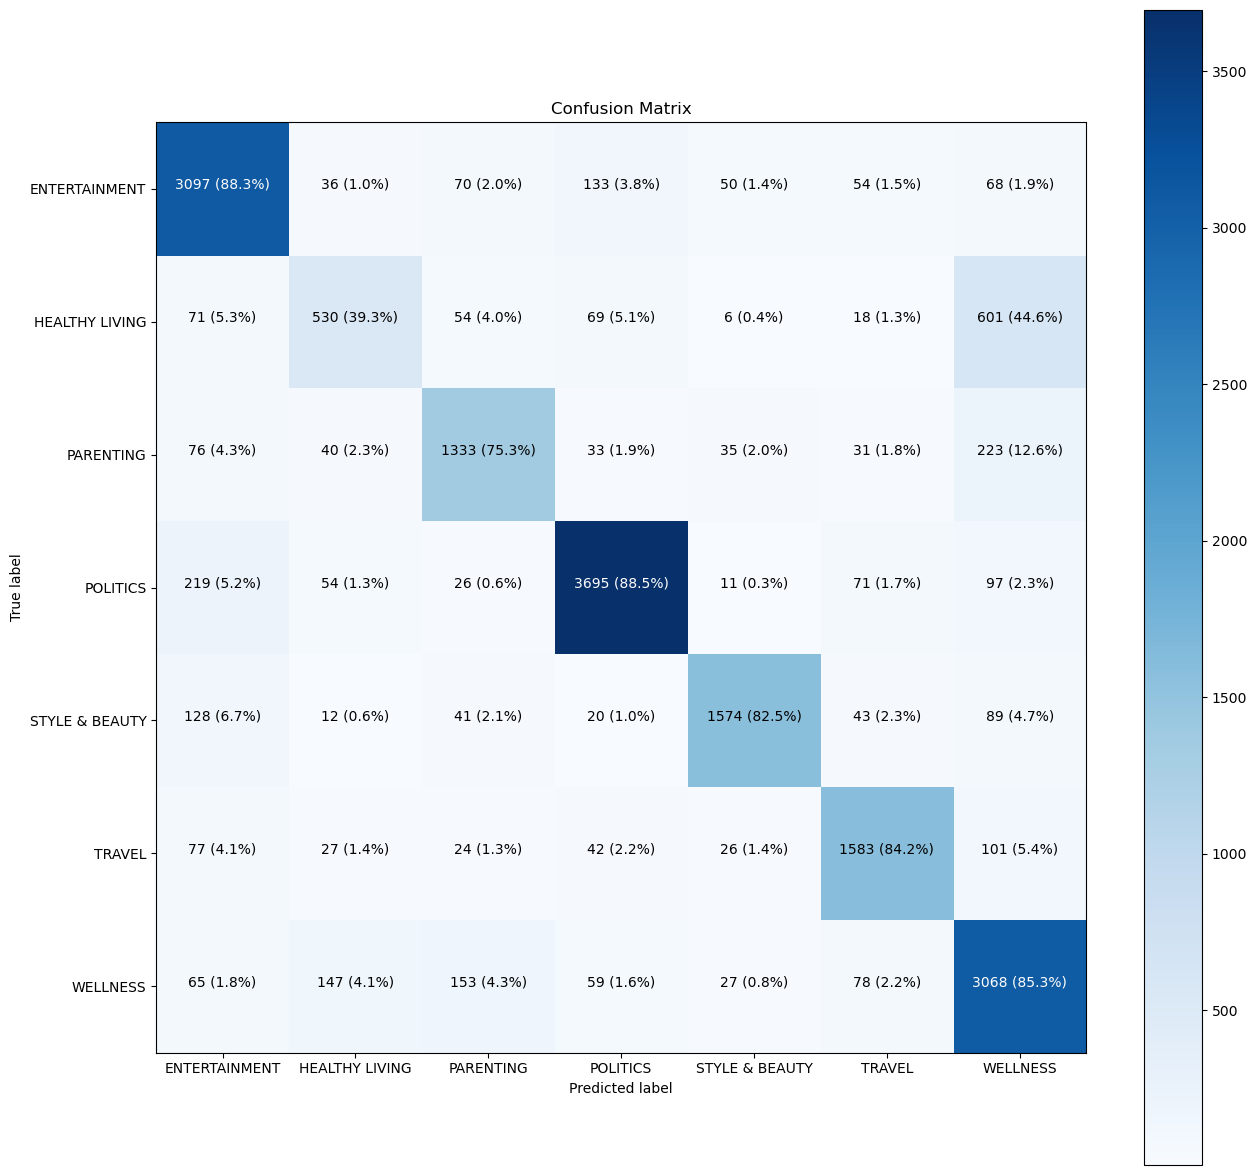

In [80]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The following `random_predictions` function picks random samples from the validation set, makes predictions on them, and prints the actual and predicted labels. It provides an intuitive way to see how the model performs on unseen data.

In [81]:
from colorama import Fore, Style

index_word = {v: k for k, v in tokenizer.word_index.items()}

def random_predictions(model, X_valid, y_valid, tokenizer, num_samples=5, class_names=None):
    # Getting indices of the random samples
    random_indices = np.random.choice(np.arange(len(X_valid)), size=num_samples, replace=False)

    # Selecting the random samples
    random_X_samples = X_valid[random_indices]
    random_y_samples = y_valid[random_indices]

    # Making predictions on the random samples
    y_pred_probs = model.predict(random_X_samples)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Print the actual and predicted labels
    for i in range(num_samples):
        text_tokens = random_X_samples[i]
        text = ' '.join([index_word.get(token) for token in text_tokens if token != 0])  # 0 is typically the padding token
        true_label = np.argmax(random_y_samples[i])
        predicted_label = y_pred[i]

        # If class names are provided, use them for printing
        if class_names is not None:
            true_label_name = class_names[true_label]
            predicted_label_name = class_names[predicted_label]
        else:
            true_label_name = true_label
            predicted_label_name = predicted_label

        # Determine the color of the text (green for correct, red for incorrect)
        text_color = Fore.GREEN if true_label == predicted_label else Fore.RED

        print(f"\nSample {i + 1}:")
        print(f"Text: {text}")
        print(text_color + f"True: {true_label_name} \n Predicted: {predicted_label_name}" + Style.RESET_ALL)


The `random_predictions` function is called to generate and display predictions on random samples.

In [82]:
random_predictions(model_dense,
                   val_padded_seq,
                   val_labels,
                   tokenizer,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 19ms/step

Sample 1:
Text: trump dangerous move towards <OOV> middle class <OOV> campaign can expect unpleasant surprise
True: POLITICS 
 Predicted: POLITICS

Sample 2:
Text: democratic senator <OOV> state come neil <OOV> claire <OOV> say shell join planned filibuster supreme court nominee
True: POLITICS 
 Predicted: POLITICS

Sample 3:
Text: here no <OOV> day looked like <OOV> <OOV> transit rider gathered tube train sunday
True: ENTERTAINMENT 
 Predicted: TRAVEL

Sample 4:
Text: diane keaton <OOV> hat <OOV> style <OOV> came want sure check huffpost style twitter facebook tumblr pinterest instagram
True: STYLE & BEAUTY 
 Predicted: STYLE & BEAUTY

Sample 5:
Text: four powerful way <OOV> can attributed reason nature spirit celebrate new year time spirit celebration <OOV> whole world also opportunity reflect year gone take stock lesson <OOV>
True: WELLNESS 
 Predicted: WELLNESS

Sample 6:
Text: utah force doctor tell woman abortion <OOV> probably

**Model: LSTM**

We now build an LSTM (Long Short-Term Memory) model for sequence classification, useful for sequence-based tasks like text classification. It starts by setting a random seed for reproducibility and creates an Embedding layer for converting input words into dense fixed-size vectors, capturing semantic word relationships.

The LSTM model is built with two consecutive LSTM layers, where the first returns sequences (outputs for each time step) enabling stacking of LSTM layers. The second LSTM layer returns the output of the final time step only. Post LSTM layers, a 64-unit dense layer with 'relu' activation is added, followed by an output dense layer with softmax activation, ideal for multiclass classification tasks.

In [83]:
# Set random seed and create embedding layer 
tf.random.set_seed(42)
from tensorflow.keras import layers
model_1LSTM_embedding = layers.Embedding(input_dim=NUM_WORDS,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=MAXLEN,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(train_padded_seq.shape[1],), dtype="int32")
x = model_1LSTM_embedding(inputs)
x = layers.LSTM(64, return_sequences=True)(x) 
x = layers.LSTM(64)(x) # return vector for whole sequence
x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1LSTM = tf.keras.Model(inputs, outputs, name="model_1LSTM")

The LSTM model is compiled with the Adam optimizer and categorical cross-entropy as the loss function, which is suitable for multiclass classification tasks.

In [84]:
# Compile model
model_1LSTM.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [85]:
model_1LSTM.summary()

Model: "model_1LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 35, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 35, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 1,367,047
Trainable params: 1,367,047
Non

We now create a checkpoint callback for model LSTM.

In [86]:
# Define the checkpoint path
checkpoint_path = "best_model_Bi-LSTM"

cc = create_checkpoint_callback(checkpoint_path)

The LSTM model is trained on train_padded_seq and train_labels, using validation data and a checkpoint callback.

In [87]:
# Fit model
model_1LSTM_history = model_1LSTM.fit(train_padded_seq, train_labels,
                              epochs=20,
                              validation_data=(val_padded_seq, val_labels),
                              callbacks=[cc])

Epoch 1/20
2274/2274 [==============================] - ETA: 0s - loss: 0.9203 - accuracy: 0.6789
Epoch 1: val_accuracy improved from -inf to 0.80401, saving model to best_model_Bi-LSTM
2274/2274 [==============================] - 57s 22ms/step - loss: 0.9203 - accuracy: 0.6789 - val_loss: 0.6464 - val_accuracy: 0.8040
Epoch 2/20
2274/2274 [==============================] - ETA: 0s - loss: 0.5140 - accuracy: 0.8391
Epoch 2: val_accuracy improved from 0.80401 to 0.81771, saving model to best_model_Bi-LSTM
2274/2274 [==============================] - 32s 14ms/step - loss: 0.5140 - accuracy: 0.8391 - val_loss: 0.6001 - val_accuracy: 0.8177
Epoch 3/20
2274/2274 [==============================] - ETA: 0s - loss: 0.4163 - accuracy: 0.8685
Epoch 3: val_accuracy improved from 0.81771 to 0.82172, saving model to best_model_Bi-LSTM
2274/2274 [==============================] - 30s 13ms/step - loss: 0.4163 - accuracy: 0.8685 - val_loss: 0.5647 - val_accuracy: 0.8217
Epoch 4/20
2272/2274 [=========

Following training, the history of LSTM model's accuracy and loss over the epochs is plotted.

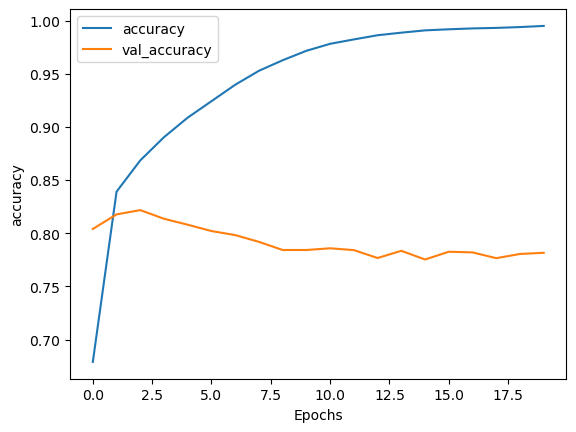

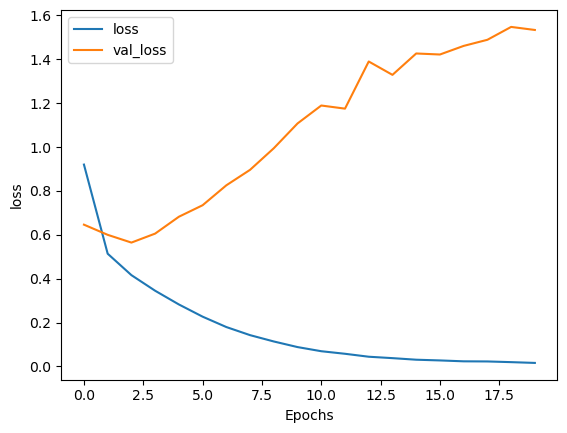

In [88]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_1LSTM_history, 'accuracy')
plot_graphs(model_1LSTM_history, 'loss')

The best LSTM model (as determined by validation accuracy) is loaded for further analysis.

In [89]:
from tensorflow.keras.models import load_model

# Load the entire model
model_1LSTM = load_model(checkpoint_path)

The LSTM model is evaluated on the validation set to understand its performance on unseen data.

In [90]:
model_1LSTM.evaluate(val_padded_seq, val_labels)

569/569 [==============================] - 3s 4ms/step - loss: 0.5647 - accuracy: 0.8217


[0.5646941661834717, 0.8217211961746216]

The LSTM model predicts probabilities on the validation set, which are then converted into class predictions.

In [91]:
# Make predictions on the validation dataset
model_1LSTM_pred_probs = model_1LSTM.predict(val_padded_seq)
model_1LSTM_pred_probs.shape, model_1LSTM_pred_probs[:10] # view the first 10

569/569 [==============================] - 4s 3ms/step


((18185, 7),
 array([[3.1487853e-03, 1.3054855e-04, 7.0834119e-04, 2.1005118e-04,
         9.9401492e-01, 5.7224784e-04, 1.2152258e-03],
        [9.3082577e-04, 2.0528019e-03, 3.4133487e-03, 1.2870699e-03,
         1.7997165e-03, 9.8545396e-01, 5.0622122e-03],
        [6.5742977e-02, 2.5293563e-02, 1.6681267e-02, 1.2590340e-01,
         7.5000837e-03, 7.1377701e-01, 4.5101702e-02],
        [4.8486460e-03, 3.3217313e-04, 1.6216284e-03, 5.3488964e-04,
         9.8828936e-01, 1.4684756e-03, 2.9049222e-03],
        [4.0754639e-03, 3.1202143e-01, 5.9864465e-03, 2.6725237e-03,
         1.2725428e-03, 2.6146675e-02, 6.4782494e-01],
        [1.7950799e-02, 1.0260815e-03, 3.8414920e-04, 9.7978091e-01,
         3.4172574e-04, 3.6121218e-04, 1.5508912e-04],
        [3.7740815e-02, 2.3458093e-02, 3.1617999e-03, 8.9891267e-01,
         2.2032782e-03, 2.7475396e-02, 7.0479559e-03],
        [8.4303338e-03, 1.7767767e-03, 1.1188259e-02, 9.9039089e-04,
         9.6306729e-01, 1.1576578e-03, 1.3389207e-

In [92]:
# Convert pred probs to classes
model_1LSTM_preds = tf.argmax(model_1LSTM_pred_probs, axis=1)
model_1LSTM_preds

<tf.Tensor: shape=(18185,), dtype=int64, numpy=array([4, 5, 5, ..., 6, 0, 1])>

Metrics such as accuracy, precision, recall, and F1-score are calculated to evaluate the performance of the LSTM model.

In [93]:
# Calculate LSTM model results
model_1LSTM_results = calculate_results(y_true=val_labels_le,
                                    y_pred=model_1LSTM_preds)
model_1LSTM_results

{'accuracy': 82.17211987902117,
 'precision': 0.8194840988858417,
 'recall': 0.8217211987902117,
 'f1': 0.8179710894141065}

The function  compares the performance metrics of the baseline model with the LSTM model. The comparison include various metrics such as accuracy, precision, recall, and F1-score.

In [94]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_1LSTM_results)

Baseline accuracy: 71.52, New accuracy: 82.17, Difference: 10.65
Baseline precision: 0.80, New precision: 0.82, Difference: 0.02
Baseline recall: 0.72, New recall: 0.82, Difference: 0.11
Baseline f1: 0.67, New f1: 0.82, Difference: 0.15


In [95]:
y_true = np.argmax(val_labels, axis=1).tolist()  # Convert one-hot encoded labels to class labels
preds = model_1LSTM.predict(val_padded_seq)
y_probs = preds.tolist()  # Store the prediction probabilities
y_preds = np.argmax(preds, axis=1).tolist()  # Convert probabilities to class predictions

569/569 [==============================] - 2s 3ms/step


A confusion matrix is generated to visualize the classification performance of the LSTM model. A custom function is used to make the matrix more readable.

In [96]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[2992,   55,   67,  180,   49,  103,   62],
       [  54,  548,   52,   87,    8,   43,  557],
       [  40,   51, 1391,   33,   37,   54,  165],
       [ 132,   80,   30, 3754,   13,   72,   92],
       [ 119,    8,   43,   19, 1593,   58,   67],
       [  39,   24,   31,   53,   24, 1648,   61],
       [  58,  111,  168,   74,   43,  126, 3017]])

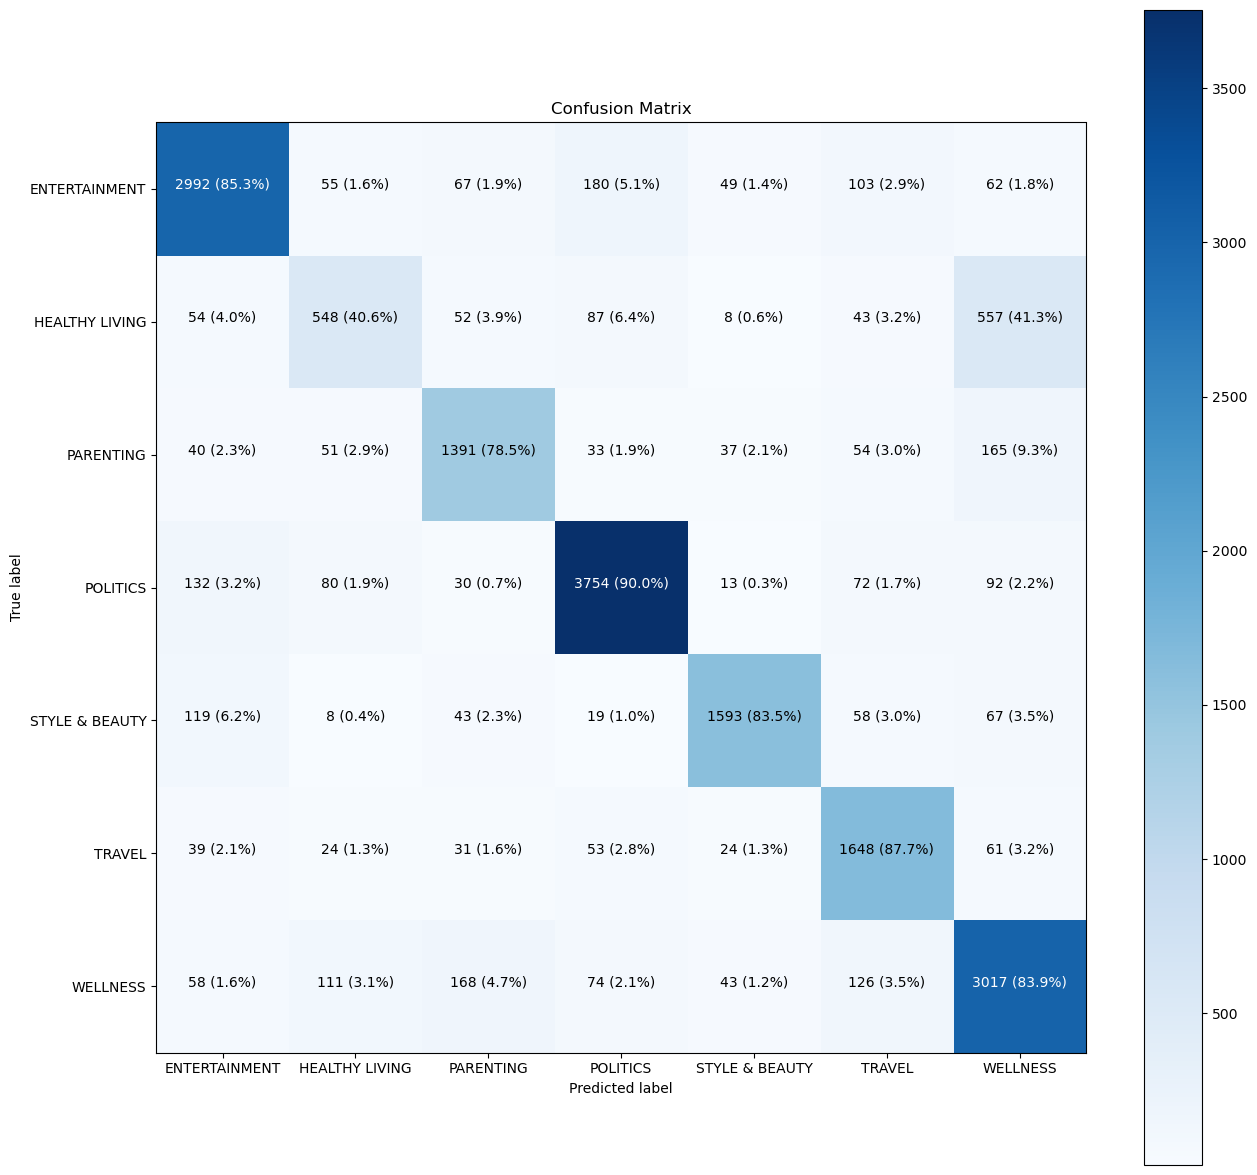

In [97]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The `random_predictions` function is called to generate and display predictions of the LSTM model on random samples.

In [98]:
random_predictions(model_1LSTM,
                   val_padded_seq,
                   val_labels,
                   tokenizer,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 22ms/step

Sample 1:
Text: christie brinkley daughter <OOV> <OOV> sign <OOV> modeling <OOV> <OOV> contract belt graduate high school thing moving fast <OOV> already
True: STYLE & BEAUTY 
 Predicted: STYLE & BEAUTY

Sample 2:
Text: want play <OOV> election <OOV> <OOV> lucky
True: POLITICS 
 Predicted: POLITICS

Sample 3:
Text: carly rae jepsen open trial fame surviving <OOV> think part survival staying <OOV> unaware
True: ENTERTAINMENT 
 Predicted: ENTERTAINMENT

Sample 4:
Text: boy <OOV> instrument dropped <OOV> comic <OOV> <OOV> artwork <OOV> <OOV> boy developed anchorman director
True: ENTERTAINMENT 
 Predicted: ENTERTAINMENT

Sample 5:
Text: drug let body temperature drop save stroke <OOV> last decade series study new england journal medicine <OOV> potential benefit <OOV>
True: WELLNESS 
 Predicted: WELLNESS

Sample 6:
Text: donald trump name kellyanne conway presidential <OOV> will <OOV> woman trump white house
True: POLITICS 
 Predicted: P

**Model: Bidirectional LSTM**

We now introduce the bidirectional LSTM (Long Short-Term Memory) model, which is an advanced version of a recurrent neural network (RNN) model. The model is highly suited for text classification tasks.

After ensuring reproducibility with a random seed, it accepts word indices as input and transforms them into dense vectors through an embedding layer. Two bidirectional LSTM layers follow, capturing both past and future context. A dense layer with 512 units and a 'relu' activation function is employed, ending with an output layer that uses softmax activation for multiclass classification. The model, dubbed 'model_lstm', is compiled with the Adam optimizer and a categorical cross-entropy loss function, suitable for multiclass classification tasks.

In [99]:
import tensorflow as tf
from tensorflow.keras import layers

# Parameters
embedding_dim=128

tf.random.set_seed(42)

# Input layer
inputs = layers.Input(shape=(train_padded_seq.shape[1],), dtype="int32")

# Create an embedding of the numerized numbers
x = layers.Embedding(input_dim=NUM_WORDS,
                     output_dim=128,
                     embeddings_initializer="uniform",
                     input_length=MAXLEN,
                     name="embedding_2")(inputs)

# Bidirectional LSTM
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
# Another LSTM Layer
x = layers.Bidirectional(layers.LSTM(64))(x)
# Dense layer
x = layers.Dense(512, activation='relu')(x)
# Output layer
outputs = layers.Dense(num_classes, activation='softmax')(x)
# Create the model
model_lstm = tf.keras.Model(inputs, outputs)


# Set the training parameters
model_lstm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Print the model summary
model_lstm.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 35, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 35, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 7)                 3591  

In [100]:
# Define the checkpoint path
checkpoint_path = "best_model_Bi-LSTM"

cc = create_checkpoint_callback(checkpoint_path)

The model is trained on train_padded_seq and train_labels, with a validation dataset and a checkpoint callback included.

In [101]:
NUM_EPOCHS = 20

# Train the model
history_lstm = model_lstm.fit(train_padded_seq, train_labels, epochs=NUM_EPOCHS, validation_data=(val_padded_seq, val_labels),callbacks=[cc])

Epoch 1/20
2274/2274 [==============================] - ETA: 0s - loss: 0.7158 - accuracy: 0.7562
Epoch 1: val_accuracy improved from -inf to 0.82101, saving model to best_model_Bi-LSTM
2274/2274 [==============================] - 92s 37ms/step - loss: 0.7158 - accuracy: 0.7562 - val_loss: 0.5385 - val_accuracy: 0.8210
Epoch 2/20
2274/2274 [==============================] - ETA: 0s - loss: 0.4340 - accuracy: 0.8575
Epoch 2: val_accuracy improved from 0.82101 to 0.82623, saving model to best_model_Bi-LSTM
2274/2274 [==============================] - 62s 27ms/step - loss: 0.4340 - accuracy: 0.8575 - val_loss: 0.5442 - val_accuracy: 0.8262
Epoch 3/20
2274/2274 [==============================] - ETA: 0s - loss: 0.3364 - accuracy: 0.8881
Epoch 3: val_accuracy did not improve from 0.82623
2274/2274 [==============================] - 35s 16ms/step - loss: 0.3364 - accuracy: 0.8881 - val_loss: 0.5616 - val_accuracy: 0.8196
Epoch 4/20
2273/2274 [============================>.] - ETA: 0s - loss:

Post-training, the model's accuracy and loss evolution across epochs is visualized.

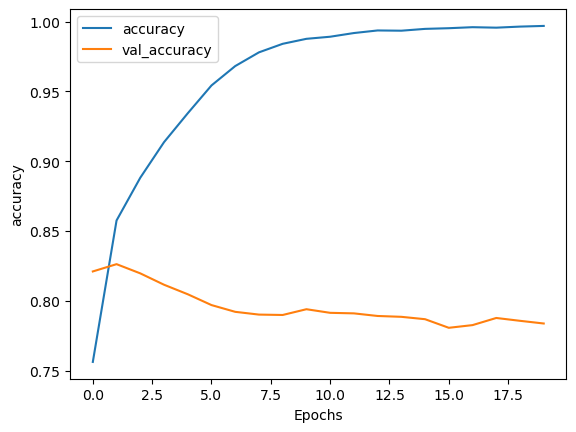

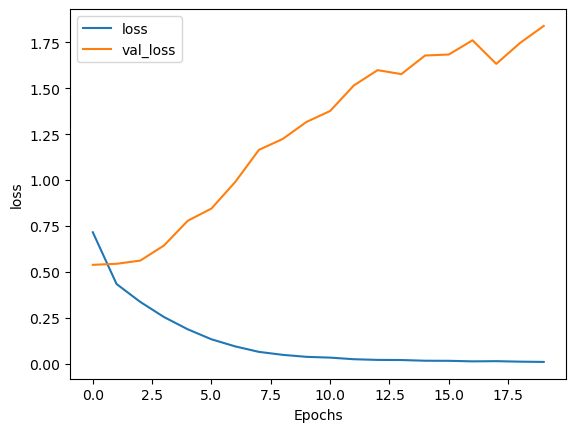

In [102]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

The model with the best validation accuracy is loaded for further usage.

In [103]:
from tensorflow.keras.models import load_model

# Load the entire model
model_lstm = load_model(checkpoint_path)

Performance of this model is assessed on the validation dataset.

In [104]:
model_lstm.evaluate(val_padded_seq, val_labels)

569/569 [==============================] - 5s 6ms/step - loss: 0.5442 - accuracy: 0.8262


[0.5442028641700745, 0.8262304067611694]

Class predictions are generated by transforming predicted probabilities on the validation dataset.

In [105]:
# Make predictions with model
model_lstm_pred_probs = model_lstm.predict(val_padded_seq)
model_lstm_pred_probs[:10]

569/569 [==============================] - 4s 6ms/step


array([[1.91394286e-03, 2.05908291e-05, 3.44617642e-04, 7.53389895e-06,
        9.95454550e-01, 1.46967603e-03, 7.89019803e-04],
       [7.13066911e-05, 9.22013569e-05, 1.46348524e-04, 2.12639043e-05,
        1.32432426e-04, 9.98373985e-01, 1.16245111e-03],
       [7.61169732e-01, 3.93288769e-03, 4.57805255e-03, 9.05622169e-02,
        1.21582616e-02, 6.45693764e-02, 6.30294606e-02],
       [2.87971972e-03, 1.73485474e-04, 2.37094751e-03, 8.95402554e-05,
        9.78283286e-01, 1.03243580e-02, 5.87857282e-03],
       [2.51961104e-03, 1.79059595e-01, 8.10455356e-04, 7.55579851e-04,
        6.86800689e-04, 6.05374807e-04, 8.15562606e-01],
       [1.73493177e-02, 4.37086419e-04, 1.13059545e-03, 9.79708016e-01,
        3.91673180e-04, 7.46061036e-04, 2.37216766e-04],
       [2.59349525e-01, 5.34891002e-02, 2.38067079e-02, 6.38709068e-01,
        7.54382834e-03, 9.29632597e-03, 7.80543499e-03],
       [3.66700697e-03, 1.33177178e-04, 3.44288838e-03, 1.30127555e-05,
        9.89117086e-01, 7

In [106]:
# Convert pred probs to classes
model_lstm_preds = tf.argmax(model_lstm_pred_probs, axis=1)
model_lstm_preds

<tf.Tensor: shape=(18185,), dtype=int64, numpy=array([4, 5, 0, ..., 6, 0, 3])>

To evaluate the model's performance, metrics such as accuracy, precision, recall, and F1-score are computed.

In [107]:
# Calculate model performance metrics
model_lstm_results = calculate_results(val_labels_le, model_lstm_preds)
model_lstm_results

{'accuracy': 82.62304096783063,
 'precision': 0.8264212968181651,
 'recall': 0.8262304096783063,
 'f1': 0.823004629674904}

Performance metrics of the baseline model and the bidirectional LSTM model are compared.

In [108]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_1LSTM_results)


Baseline accuracy: 71.52, New accuracy: 82.17, Difference: 10.65
Baseline precision: 0.80, New precision: 0.82, Difference: 0.02
Baseline recall: 0.72, New recall: 0.82, Difference: 0.11
Baseline f1: 0.67, New f1: 0.82, Difference: 0.15


In [109]:
y_true = np.argmax(val_labels, axis=1).tolist()  # Convert one-hot encoded labels to class labels
preds = model_lstm.predict(val_padded_seq)
y_probs = preds.tolist()  # Store the prediction probabilities
y_preds = np.argmax(preds, axis=1).tolist()  # Convert probabilities to class predictions

569/569 [==============================] - 3s 6ms/step


A confusion matrix is constructed to offer a visual perspective of the classification model's performance. The matrix is simplified using a custom function.

In [110]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)


array([[3023,   67,   62,  158,   70,   44,   84],
       [  42,  565,   67,   70,    4,   35,  566],
       [  43,   29, 1420,   25,   35,   44,  175],
       [ 128,   83,   42, 3739,   12,   65,  104],
       [  92,    3,   48,   19, 1578,   42,  125],
       [  64,   22,   20,   60,   25, 1611,   78],
       [  49,   83,  205,   58,   19,   94, 3089]])

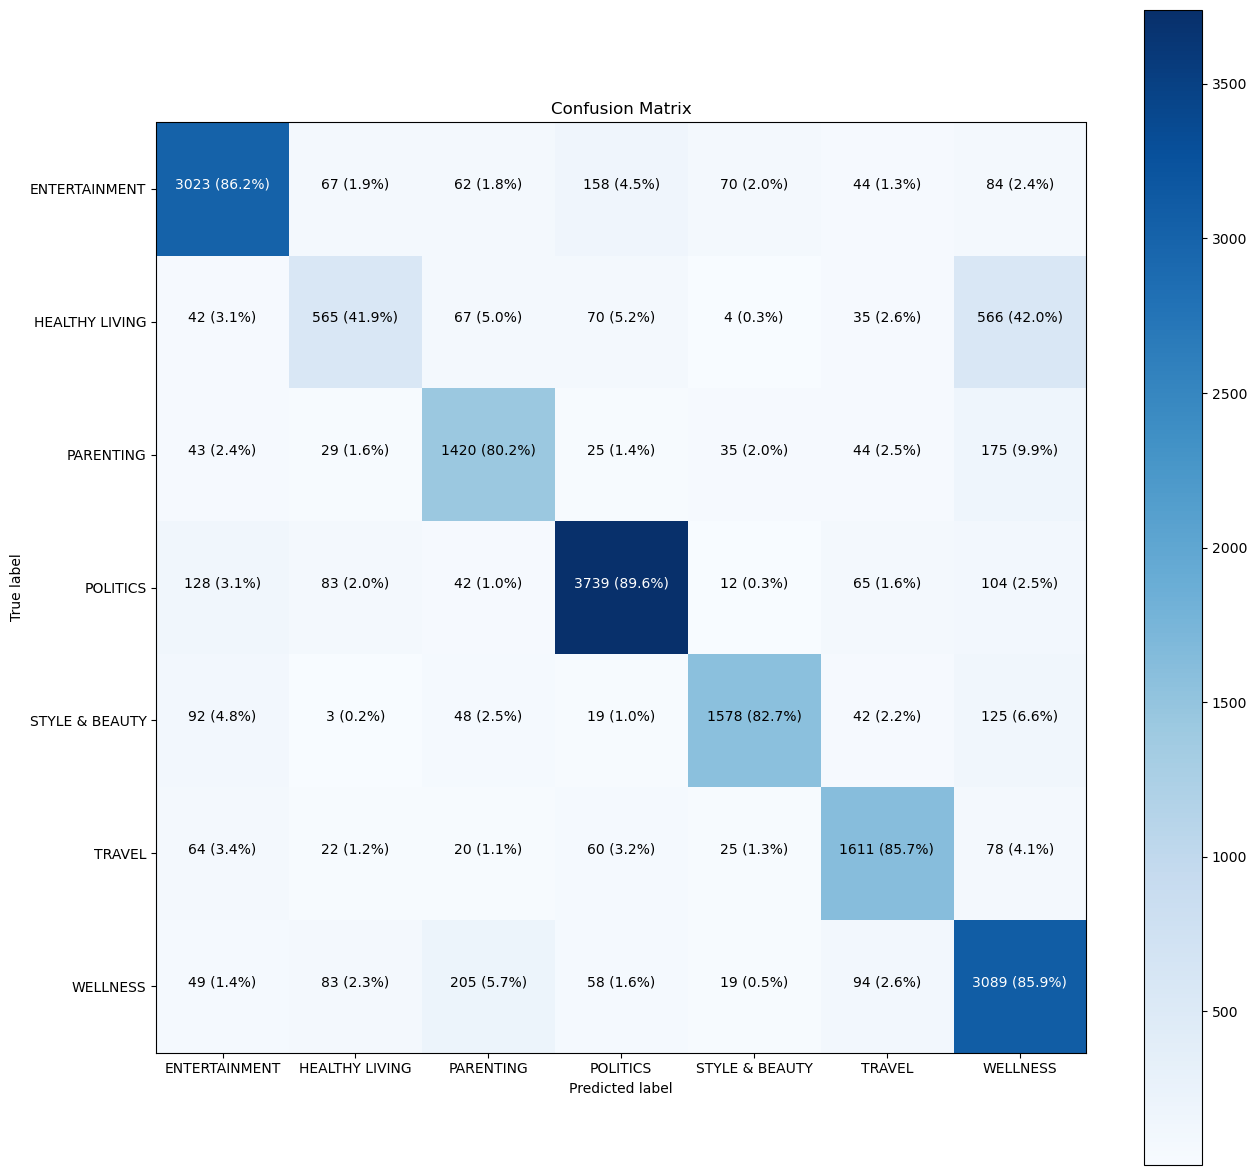

In [111]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The function '`random_predictions`' is invoked to generate and display predictions on random samples.

In [112]:
random_predictions(model_lstm,
                   val_padded_seq,
                   val_labels,
                   tokenizer,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 24ms/step

Sample 1:
Text: barack obama will hand donald trump sweeping ability wage war without <OOV> notoriously unpredictable presidentelect will soon decide target drone strike
True: POLITICS 
 Predicted: POLITICS

Sample 2:
Text: holiday hero without going <OOV> top five lesson put joy take debt holiday season
True: PARENTING 
 Predicted: WELLNESS

Sample 3:
Text: 5 last minute family spring break <OOV> glimpse robin atop huge snow pile doesnt seem hold usual promise warmer temperature close hand
True: TRAVEL 
 Predicted: PARENTING

Sample 4:
Text: <OOV> <OOV> style stylelist <OOV> afternoon general <OOV> photo <OOV> zooey love <OOV> vintage photograph cant
True: STYLE & BEAUTY 
 Predicted: STYLE & BEAUTY

Sample 5:
Text: secret woman need know buying <OOV> biggest secret woman need know making shoe comfortable 2013 buying shoe proper arch support important thing woman
True: STYLE & BEAUTY 
 Predicted: STYLE & BEAUTY

Sample 6:
Text: north

**Model: GRU**

This next code creates a recurrent neural network (RNN) model using Gated Recurrent Units (GRUs), known for their efficiency with sequence-based data. After setting a random seed for consistency, it uses an Embedding layer to convert input words into fixed-size dense vectors. The core of the model involves two GRU layers, with the first returning sequences to allow for stacking. A Dense layer follows the GRUs, and finally, an output layer with softmax activation function suitable for multiclass classification tasks. This model, named 'model_GRU', is ideal for text classification tasks.

In [113]:
# Set random seed and create embedding layer
tf.random.set_seed(42)

from tensorflow.keras import layers
model_GRU_embedding = layers.Embedding(input_dim=NUM_WORDS,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=MAXLEN,
                                     name="embedding_GRU")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(train_padded_seq.shape[1],), dtype="int32")
# x = text_vectorizer(inputs)
x = model_GRU_embedding(inputs)
x = layers.GRU(64, return_sequences=True)(x)  
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_GRU = tf.keras.Model(inputs, outputs, name="model_GRU")

The 'model_GRU' is compiled using the Adam optimizer and categorical cross-entropy as the loss function, suitable for multiclass classification tasks.

In [114]:
# Compile GRU model
model_GRU.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [115]:
# Get a summary of the GRU model
model_GRU.summary()

Model: "model_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding_GRU (Embedding)   (None, 35, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 35, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 7)                 455       
                                                                 
Total params: 1,346,823
Trainable params: 1,346,823
Non-t

A checkpoint callback is created for the GRU model.

In [116]:
# Define the checkpoint path
checkpoint_path = "best_model_GRU"

cc = create_checkpoint_callback(checkpoint_path)

The model is trained using the padded sequences and labels, with validation data and the checkpoint callback provided.

In [117]:
# Fit model
model_GRU_history = model_GRU.fit(train_padded_seq, train_labels,
                              epochs=20,
                              validation_data=(val_padded_seq, val_labels),
                              callbacks=[cc])

Epoch 1/20
2274/2274 [==============================] - ETA: 0s - loss: 0.9238 - accuracy: 0.6680
Epoch 1: val_accuracy improved from -inf to 0.81259, saving model to best_model_GRU
2274/2274 [==============================] - 56s 23ms/step - loss: 0.9238 - accuracy: 0.6680 - val_loss: 0.5744 - val_accuracy: 0.8126
Epoch 2/20
2274/2274 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.8426
Epoch 2: val_accuracy improved from 0.81259 to 0.82673, saving model to best_model_GRU
2274/2274 [==============================] - 30s 13ms/step - loss: 0.4850 - accuracy: 0.8426 - val_loss: 0.5366 - val_accuracy: 0.8267
Epoch 3/20
2274/2274 [==============================] - ETA: 0s - loss: 0.3843 - accuracy: 0.8743
Epoch 3: val_accuracy did not improve from 0.82673
2274/2274 [==============================] - 22s 10ms/step - loss: 0.3843 - accuracy: 0.8743 - val_loss: 0.5458 - val_accuracy: 0.8239
Epoch 4/20
2268/2274 [============================>.] - ETA: 0s - loss: 0.3044 

The model's accuracy and loss history is visualized post-training.

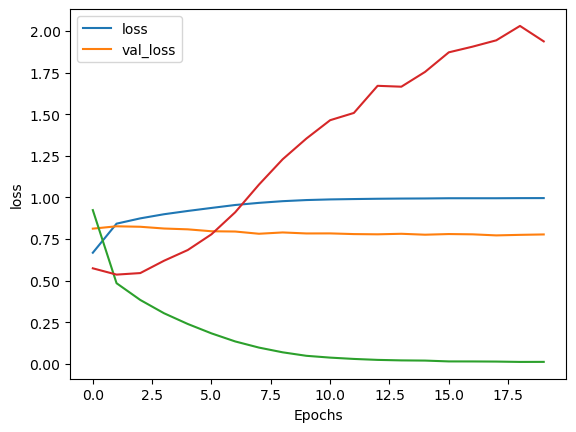

In [118]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
#   plt.show()

# Plot the accuracy and loss history
plot_graphs(model_GRU_history, 'accuracy')
plot_graphs(model_GRU_history, 'loss')

The best model, determined by validation accuracy, is then loaded.

In [119]:
from tensorflow.keras.models import load_model

# Load the entire model
model_GRU = load_model(checkpoint_path)

Model evaluation occurs on the validation set.

In [120]:
model_GRU.evaluate(val_padded_seq, val_labels)

569/569 [==============================] - 3s 4ms/step - loss: 0.5366 - accuracy: 0.8267


[0.5366080403327942, 0.8267253041267395]

The model predicts probabilities on the validation set, converting these into class predictions.

In [121]:
# Make predictions on the validation data
model_GRU_pred_probs = model_GRU.predict(val_padded_seq)
model_GRU_pred_probs.shape, model_GRU_pred_probs[:10]

569/569 [==============================] - 2s 3ms/step


((18185, 7),
 array([[1.7617944e-03, 1.4118604e-04, 2.9048757e-04, 3.5694764e-05,
         9.9504626e-01, 1.8765565e-03, 8.4800064e-04],
        [4.2507146e-04, 5.9026357e-04, 5.1728904e-04, 2.2627924e-04,
         9.6886855e-04, 9.9289662e-01, 4.3755998e-03],
        [7.8969073e-01, 2.6009972e-03, 2.7984325e-03, 1.2199156e-01,
         5.6988109e-02, 1.4910290e-02, 1.1019988e-02],
        [2.1678917e-03, 1.3340840e-03, 1.4877028e-03, 1.3100714e-03,
         9.4227874e-01, 4.5085374e-02, 6.3361977e-03],
        [1.0742011e-03, 2.8689229e-01, 1.6230274e-03, 1.4626127e-03,
         1.1078169e-03, 1.2985030e-02, 6.9485503e-01],
        [7.8023141e-03, 1.1537079e-03, 3.4510708e-04, 9.9033386e-01,
         4.0380037e-05, 1.2150520e-04, 2.0313857e-04],
        [1.8066024e-02, 2.0215930e-02, 5.8965948e-03, 9.3223870e-01,
         1.5823438e-03, 1.2748841e-02, 9.2516383e-03],
        [5.2160984e-03, 4.5813911e-04, 2.6538167e-03, 7.6734803e-05,
         9.8822111e-01, 8.9742924e-04, 2.4766270e-

In [122]:
# Convert pred probs to classes
model_GRU_preds = tf.argmax(model_GRU_pred_probs, axis=1)
model_GRU_preds

<tf.Tensor: shape=(18185,), dtype=int64, numpy=array([4, 5, 0, ..., 6, 0, 1])>

Performance metrics, including accuracy, precision, recall, and F1-score, are computed for model evaluation.

In [123]:
# Calcuate model_3 results
model_GRU_results = calculate_results(y_true=val_labels_le,
                                    y_pred=model_GRU_preds)
model_GRU_results

{'accuracy': 82.6725323068463,
 'precision': 0.8264625670097592,
 'recall': 0.826725323068463,
 'f1': 0.8227635497759525}

The baseline model's performance is compared with the bidirectional LSTM model.

In [124]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_GRU_results)

Baseline accuracy: 71.52, New accuracy: 82.67, Difference: 11.15
Baseline precision: 0.80, New precision: 0.83, Difference: 0.03
Baseline recall: 0.72, New recall: 0.83, Difference: 0.11
Baseline f1: 0.67, New f1: 0.82, Difference: 0.15


In [125]:
y_true = np.argmax(val_labels, axis=1).tolist()  # Convert one-hot encoded labels to class labels
preds = model_GRU.predict(val_padded_seq)
y_probs = preds.tolist()  # Store the prediction probabilities
y_preds = np.argmax(preds, axis=1).tolist()  # Convert probabilities to class predictions

569/569 [==============================] - 2s 3ms/step


A confusion matrix is created for visualization of the model's classification performance. The matrix readability is enhanced via a custom function.

In [126]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[3111,   55,   48,  121,   57,   51,   65],
       [  57,  537,   64,   77,    6,   30,  578],
       [  69,   27, 1382,   22,   38,   38,  195],
       [ 179,   76,   33, 3714,   11,   51,  109],
       [ 116,    6,   39,   20, 1571,   48,  107],
       [  54,   26,   26,   54,   21, 1609,   90],
       [  53,   87,  193,   48,   24,   82, 3110]])

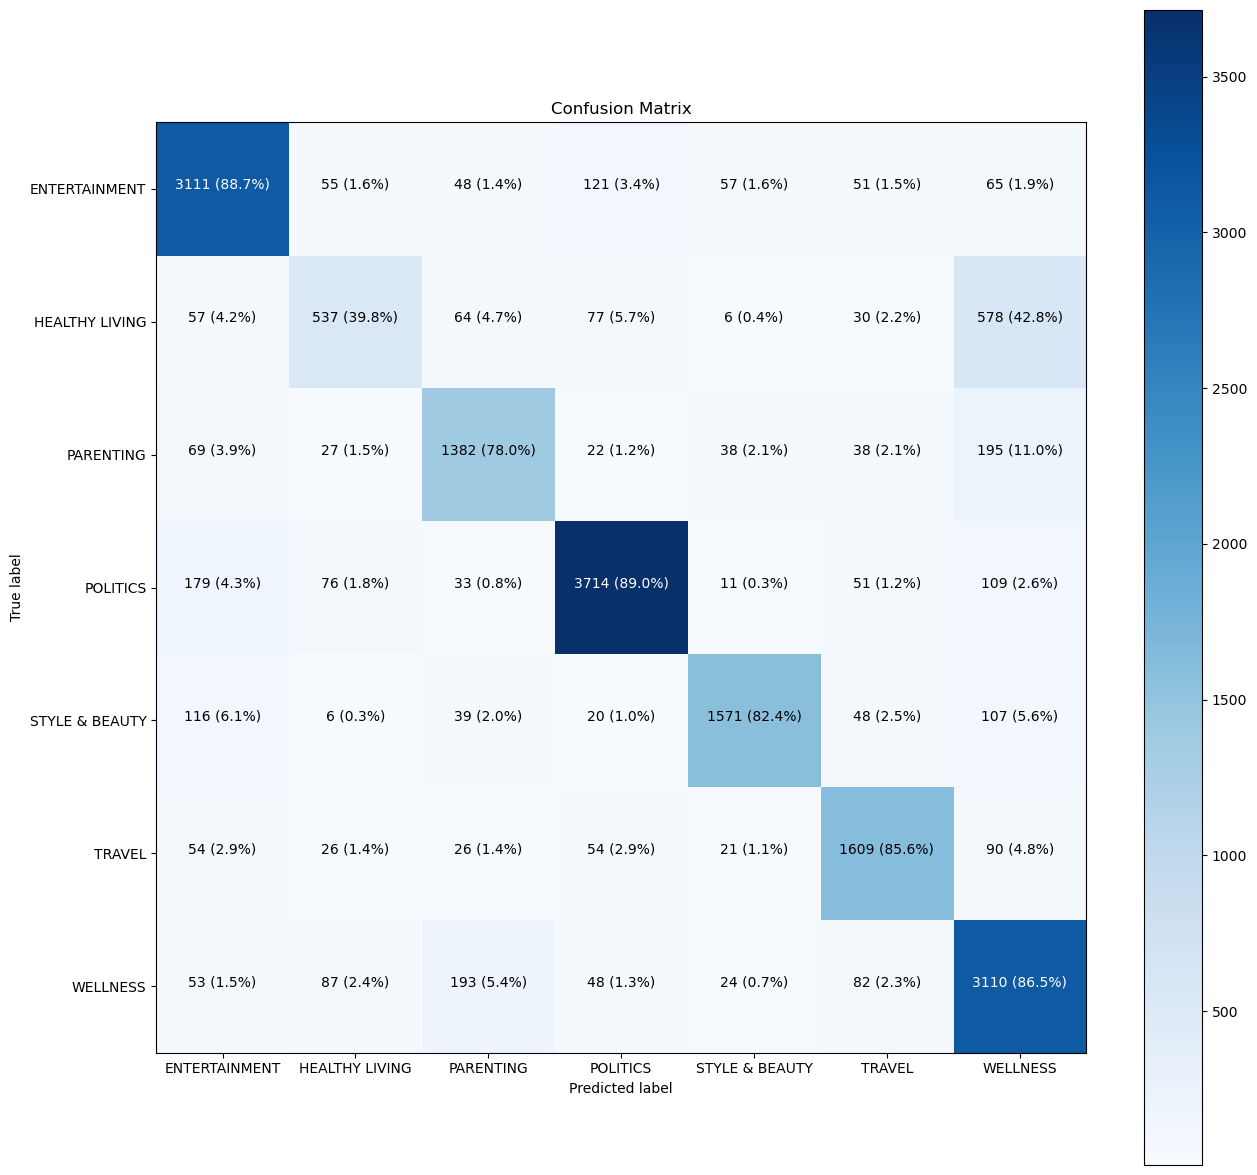

In [127]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Lastly, the '`random_predictions`' function generates and displays predictions on random samples.

In [128]:
random_predictions(model_GRU,
                   val_padded_seq,
                   val_labels,
                   tokenizer,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 21ms/step

Sample 1:
Text: miley cyrus billboard music award 2012 singer wear <OOV> <OOV> white blazer <OOV> cyrus however left no question hanging bold outfit sunday night 2012 billboard music award girlfriend
True: STYLE & BEAUTY 
 Predicted: STYLE & BEAUTY

Sample 2:
Text: nicki minaj best part robin <OOV> new song back <OOV> minaj saving song one hillary clinton lyric time
True: ENTERTAINMENT 
 Predicted: ENTERTAINMENT

Sample 3:
Text: josh <OOV> hint hunger game <OOV> one know <OOV> <OOV> good thing must come end point can fairly sure wasnt
True: ENTERTAINMENT 
 Predicted: ENTERTAINMENT

Sample 4:
Text: life <OOV> good body <OOV> italian <OOV> foreign affair declared 2013 year italian culture united state italian culture <OOV> around beauty love passion <OOV> thing feed body soul
True: WELLNESS 
 Predicted: TRAVEL

Sample 5:
Text: <OOV> prescribed treat adhd child teen new study <OOV> commonly prescribed <OOV> drug named <OOV> author write

**Model: Bi-directional GRU**

This follwoing code establishes a bidirectional recurrent neural network (RNN) model utilizing Gated Recurrent Units (GRUs). By setting a random seed, the model ensures consistency. An Embedding layer initially converts input words into dense vectors of fixed size. The main structure of the model consists of two bidirectional GRU layers, allowing it to capture past and future context from the input sequence. A Dense layer is added after the GRUs, followed by an output layer that uses a softmax activation function suitable for multiclass classification tasks.

In [129]:
# Set random seed and create embedding layer 
tf.random.set_seed(42)

from tensorflow.keras import layers
model_GRU_embedding = layers.Embedding(input_dim=NUM_WORDS,
                                       output_dim=128,
                                       embeddings_initializer="uniform",
                                       input_length=MAXLEN,
                                       name="embedding_GRU")

# Build a bidirectional RNN using the GRU cell
inputs = layers.Input(shape=(train_padded_seq.shape[1],), dtype="int32")
# x = text_vectorizer(inputs)
x = model_GRU_embedding(inputs)
x = layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_bi_GRU = tf.keras.Model(inputs, outputs, name="model_bi_GRU")


The 'model_bi_GRU' is compiled using the Adam optimizer and the categorical cross-entropy as the loss function, which is suitable for multiclass classification tasks.

In [130]:
# Compile bi-GRU model
model_bi_GRU.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [131]:
# Get a summary of the GRU model
model_bi_GRU.summary()

Model: "model_bi_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding_GRU (Embedding)   (None, 35, 128)           1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 35, 128)          74496     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 7)                

In [132]:
# Define the checkpoint path
checkpoint_path = "best_model_bi_GRU"

cc = create_checkpoint_callback(checkpoint_path)

The model is trained on train_padded_seq and train_labels, with the validation data and the checkpoint callback provided.

In [133]:
# Fit model
model_bi_GRU_history = model_bi_GRU.fit(train_padded_seq, train_labels,
                                        epochs=20,
                                        validation_data=(val_padded_seq, val_labels),
                                        callbacks=[cc])

Epoch 1/20
2274/2274 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.7650
Epoch 1: val_accuracy improved from -inf to 0.82678, saving model to best_model_bi_GRU
2274/2274 [==============================] - 85s 33ms/step - loss: 0.6926 - accuracy: 0.7650 - val_loss: 0.5217 - val_accuracy: 0.8268
Epoch 2/20
2274/2274 [==============================] - ETA: 0s - loss: 0.4252 - accuracy: 0.8598
Epoch 2: val_accuracy improved from 0.82678 to 0.82843, saving model to best_model_bi_GRU
2274/2274 [==============================] - 58s 26ms/step - loss: 0.4252 - accuracy: 0.8598 - val_loss: 0.5321 - val_accuracy: 0.8284
Epoch 3/20
2274/2274 [==============================] - ETA: 0s - loss: 0.3346 - accuracy: 0.8876
Epoch 3: val_accuracy did not improve from 0.82843
2274/2274 [==============================] - 36s 16ms/step - loss: 0.3346 - accuracy: 0.8876 - val_loss: 0.5605 - val_accuracy: 0.8208
Epoch 4/20
2271/2274 [============================>.] - ETA: 0s - loss: 0

After the training phase, the model's history of accuracy and loss is plotted over epochs.

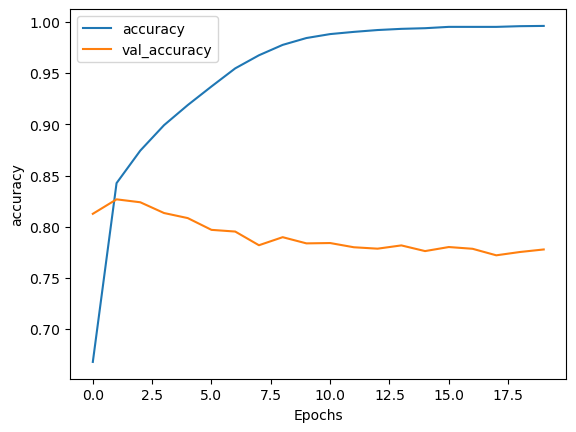

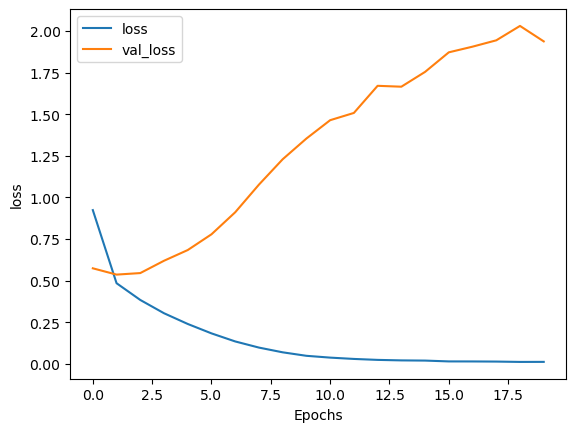

In [134]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_GRU_history, 'accuracy')
plot_graphs(model_GRU_history, 'loss')

The optimal model, based on validation accuracy, is loaded for further use.

In [135]:
from tensorflow.keras.models import load_model

# Load the entire model
model_bi_GRU = load_model(checkpoint_path)

The model's performance is evaluated on the validation dataset.

In [136]:
model_bi_GRU.evaluate(val_padded_seq, val_labels)

569/569 [==============================] - 5s 6ms/step - loss: 0.5321 - accuracy: 0.8284


[0.5321122407913208, 0.8284299969673157]

The model predicts class probabilities on the validation dataset, which are then transformed into class predictions.

In [137]:
# Make predictions on the validation data
model_bi_GRU_pred_probs = model_bi_GRU.predict(val_padded_seq)
model_bi_GRU_pred_probs.shape, model_bi_GRU_pred_probs[:10]

569/569 [==============================] - 4s 5ms/step


((18185, 7),
 array([[6.85376639e-04, 1.30576955e-05, 2.41353802e-04, 7.96605400e-06,
         9.97362673e-01, 9.15438228e-04, 7.74068001e-04],
        [2.13748164e-04, 2.62818969e-04, 1.03844606e-04, 7.46132209e-05,
         1.11097656e-03, 9.97162163e-01, 1.07186264e-03],
        [3.97646815e-01, 5.70412586e-03, 4.05830797e-03, 1.32954925e-01,
         2.23624669e-02, 4.02194411e-01, 3.50789949e-02],
        [1.41399901e-03, 6.68467183e-05, 1.96767069e-04, 9.76460797e-05,
         9.95196760e-01, 8.49540695e-04, 2.17834837e-03],
        [1.76277058e-03, 1.99872762e-01, 1.56054751e-03, 1.17045257e-03,
         1.07325928e-03, 1.42443040e-02, 7.80315876e-01],
        [4.34516137e-03, 1.52386213e-03, 8.48050986e-05, 9.93765950e-01,
         3.70193302e-05, 7.04001723e-05, 1.72754109e-04],
        [1.21716581e-01, 3.54982242e-02, 4.05148510e-03, 8.23737800e-01,
         4.85182321e-03, 6.96750917e-03, 3.17658857e-03],
        [5.84472204e-03, 1.50909676e-04, 5.73060149e-03, 1.11437312e-0

In [138]:
# Convert pred probs to classes
model_bi_GRU_preds = tf.argmax(model_bi_GRU_pred_probs, axis=1)
model_bi_GRU_preds

<tf.Tensor: shape=(18185,), dtype=int64, numpy=array([4, 5, 5, ..., 6, 0, 1])>

Various performance metrics, such as accuracy, precision, recall, and the F1-score, are computed for model evaluation.

In [139]:
# Calcuate model_bi_GRU results
model_bi_GRU_results = calculate_results(y_true=val_labels_le,
                                    y_pred=model_bi_GRU_preds)
model_bi_GRU_results

{'accuracy': 82.84300247456696,
 'precision': 0.8273176848710595,
 'recall': 0.8284300247456695,
 'f1': 0.8258522452543736}

The model's performance is compared with that of the baseline and the bidirectional LSTM models.

In [140]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_bi_GRU_results)

Baseline accuracy: 71.52, New accuracy: 82.84, Difference: 11.32
Baseline precision: 0.80, New precision: 0.83, Difference: 0.03
Baseline recall: 0.72, New recall: 0.83, Difference: 0.11
Baseline f1: 0.67, New f1: 0.83, Difference: 0.15


In [141]:
y_true = np.argmax(val_labels, axis=1).tolist()  # Convert one-hot encoded labels to class labels
preds = model_bi_GRU.predict(val_padded_seq)
y_probs = preds.tolist()  # Store the prediction probabilities
y_preds = np.argmax(preds, axis=1).tolist()  # Convert probabilities to class predictions

569/569 [==============================] - 3s 5ms/step


To visualize the model's classification performance, a confusion matrix is generated. Its readability is enhanced through a custom function.

In [142]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[3071,   67,   57,  131,   72,   30,   80],
       [  46,  601,   52,   72,   14,   32,  532],
       [  50,   27, 1405,   30,   39,   36,  184],
       [ 167,   89,   31, 3739,   14,   41,   92],
       [  78,    7,   42,   17, 1620,   47,   96],
       [  65,   21,   24,   71,   25, 1577,   97],
       [  58,  139,  172,   64,   37,   75, 3052]])

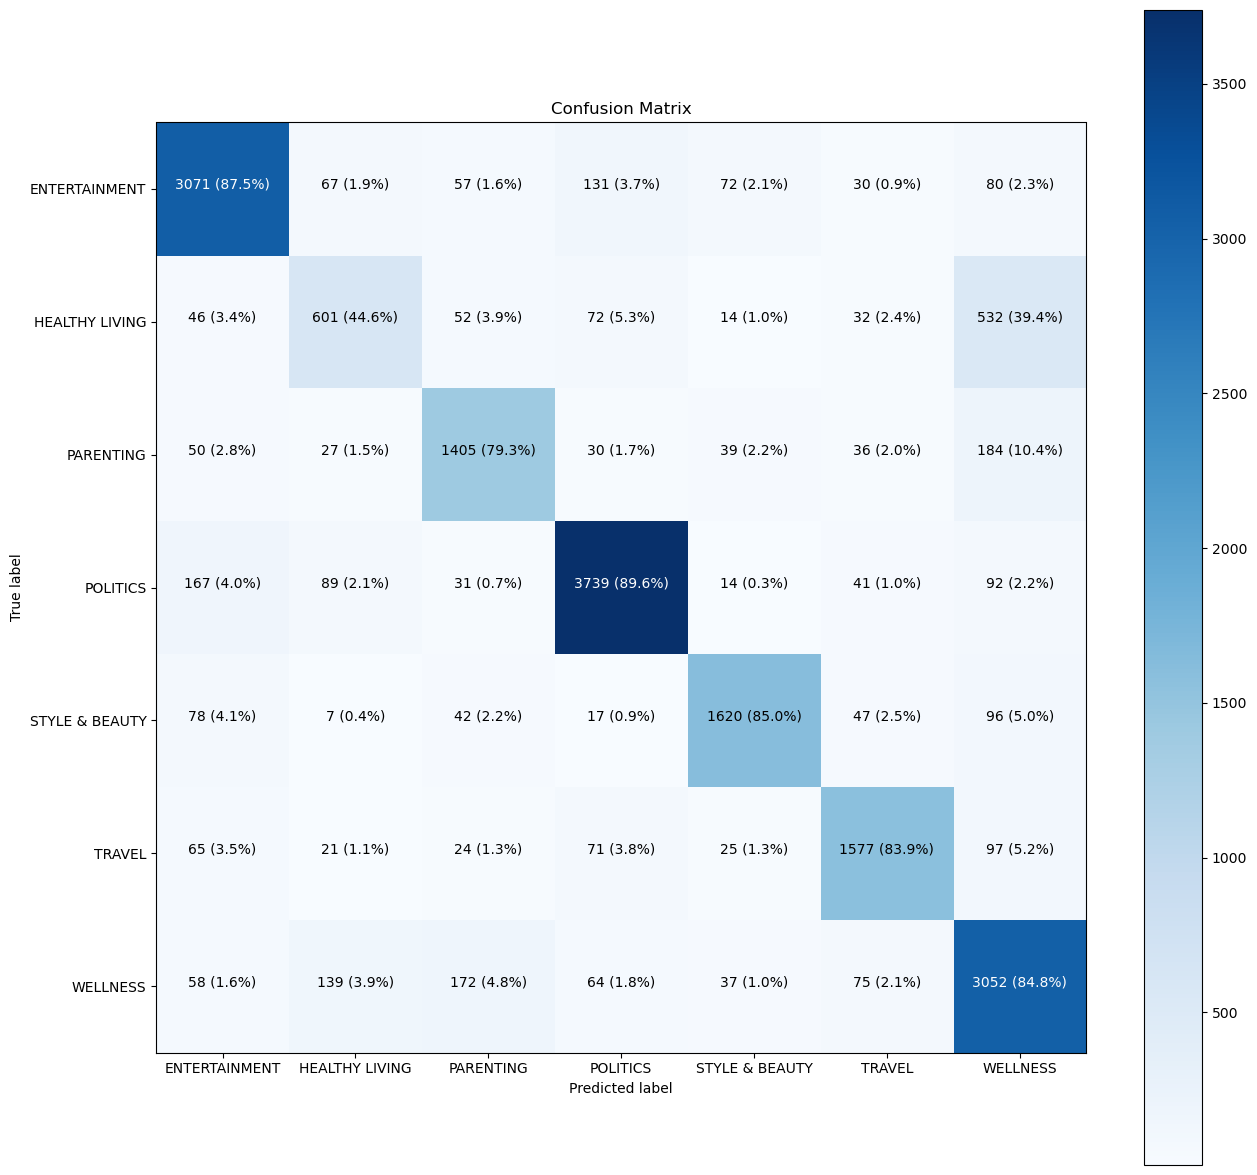

In [143]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Finally, the function '`random_predictions`' is invoked to generate and display predictions on random samples.

In [144]:
random_predictions(model_bi_GRU,
                   val_padded_seq,
                   val_labels,
                   tokenizer,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 23ms/step

Sample 1:
Text: jessica chastain responds criticism <OOV> magazine <OOV> industry need become inclusive storytelling
True: ENTERTAINMENT 
 Predicted: ENTERTAINMENT

Sample 2:
Text: spilled milk <OOV> <OOV> long ago little <OOV> took road trip los angeles portland <OOV> predict end wont gay marriage brings destruction american family will road trip
True: PARENTING 
 Predicted: PARENTING

Sample 3:
Text: democratic senator call investigation jeff session james comey <OOV> attorney general violate <OOV> promise
True: POLITICS 
 Predicted: POLITICS

Sample 4:
Text: third american infected ebola released hospital
True: HEALTHY LIVING 
 Predicted: HEALTHY LIVING

Sample 5:
Text: legend georgia <OOV> drag new <OOV> production matthew lopez legend georgia <OOV> <OOV> <OOV> village like <OOV> boot broadway feature stunning high <OOV> footwear overthetop pastel wig
True: ENTERTAINMENT 
 Predicted: ENTERTAINMENT

Sample 6:
Text: can prevent <OO

**Model: Conv1D**

This next code block constructs a 1D Convolutional Neural Network (CNN) model for text classification. The process starts by setting a random seed for reproducibility and defining the model's parameters. An input layer accepts the sequences of word indices. These indices are transformed into dense vectors using an Embedding layer. The Conv1D layer with a specified number of filters and kernel size applies convolution operations on the sequences. A GlobalMaxPooling1D layer follows, reducing the spatial dimensions of the output. A dense layer with 'relu' activation is then added, leading to an output layer with softmax activation, appropriate for multiclass classification.

In [145]:
from tensorflow.keras import layers

# Parameters
embedding_dim = 128
filters = 64
kernel_size = 5

tf.random.set_seed(42)

# Input layer
inputs = layers.Input(shape=(train_padded_seq.shape[1],), dtype="int32")

# Create an embedding of the numerized numbers
x = layers.Embedding(input_dim=NUM_WORDS,
                     output_dim=embedding_dim,
                     embeddings_initializer="uniform",
                     input_length=MAXLEN,
                     name="embedding_2")(inputs)
# Conv1D layer
x = layers.Conv1D(filters, kernel_size, activation='relu')(x)
# GlobalMaxPooling1D layer
x = layers.GlobalMaxPooling1D()(x)
# Dense layer
x = layers.Dense(512, activation='relu')(x)
# Output layer
outputs = layers.Dense(num_classes, activation='softmax')(x)
# Create the model
model_conv = tf.keras.Model(inputs, outputs)

The 'model_conv' is compiled with the Adam optimizer and categorical cross-entropy as its loss function, fitting for multiclass classification tasks.

In [146]:
# Set the training parameters
model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 35, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 31, 64)            41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_9 (Dense)             (None, 512)               33280     
                                                                 
 dense_10 (Dense)            (None, 7)                 3591      
                                                           

In [147]:
# Define the checkpoint path
checkpoint_path = "best_model_conv"

cc = create_checkpoint_callback(checkpoint_path)

The model is trained on train_padded_seq and train_labels, along with validation data and the checkpoint callback.

In [148]:
NUM_EPOCHS = 20

# Train the model
history_conv1d = model_conv.fit(train_padded_seq, train_labels, epochs=NUM_EPOCHS, validation_data=(val_padded_seq, val_labels),callbacks=[cc])

Epoch 1/20
2274/2274 [==============================] - ETA: 0s - loss: 0.7432 - accuracy: 0.7463
Epoch 1: val_accuracy improved from -inf to 0.81155, saving model to best_model_conv
2274/2274 [==============================] - 39s 15ms/step - loss: 0.7432 - accuracy: 0.7463 - val_loss: 0.5738 - val_accuracy: 0.8115
Epoch 2/20
2274/2274 [==============================] - ETA: 0s - loss: 0.3913 - accuracy: 0.8689
Epoch 2: val_accuracy did not improve from 0.81155
2274/2274 [==============================] - 12s 5ms/step - loss: 0.3913 - accuracy: 0.8689 - val_loss: 0.6093 - val_accuracy: 0.7995
Epoch 3/20
2274/2274 [==============================] - ETA: 0s - loss: 0.2010 - accuracy: 0.9320
Epoch 3: val_accuracy did not improve from 0.81155
2274/2274 [==============================] - 12s 5ms/step - loss: 0.2010 - accuracy: 0.9320 - val_loss: 0.7532 - val_accuracy: 0.7940
Epoch 4/20
2266/2274 [============================>.] - ETA: 0s - loss: 0.0888 - accuracy: 0.9700
Epoch 4: val_accur

After training, the model's accuracy and loss history are plotted over the epochs.

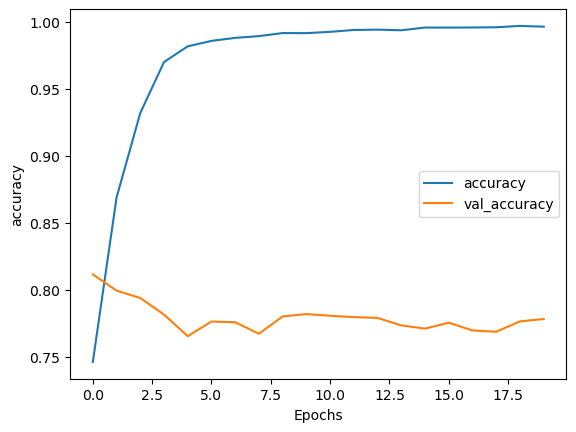

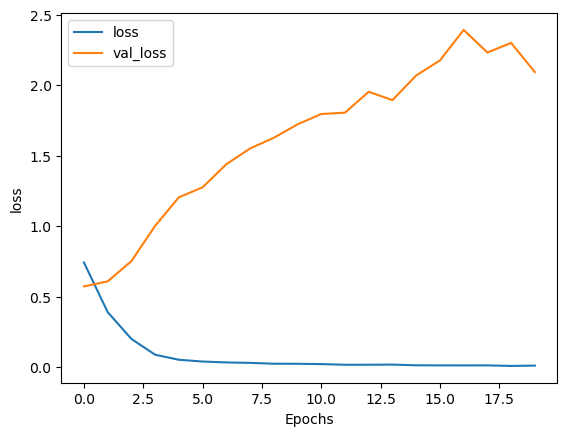

In [149]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history_conv1d, 'accuracy')
plot_graphs(history_conv1d, 'loss')

The best-performing model, determined by validation accuracy, is loaded for future use.

In [150]:
from tensorflow.keras.models import load_model

# Load the entire model
model_conv = load_model(checkpoint_path)

The model is evaluated on the validation set, after which probabilities are predicted and transformed into class predictions.

In [151]:
model_conv.evaluate(val_padded_seq, val_labels)

569/569 [==============================] - 2s 3ms/step - loss: 0.5738 - accuracy: 0.8115


[0.5737588405609131, 0.8115479946136475]

In [152]:
# Make predictions with model_conv
model_conv_pred_probs = model_conv.predict(val_padded_seq)
model_conv_pred_probs[:10]

569/569 [==============================] - 1s 2ms/step


array([[5.95381297e-03, 3.45729022e-05, 6.02462562e-04, 2.23213883e-05,
        9.90939021e-01, 2.30232067e-03, 1.45427199e-04],
       [2.37025996e-03, 1.62874209e-03, 1.37599534e-03, 9.51929978e-05,
        2.69336961e-02, 9.59271729e-01, 8.32426827e-03],
       [3.81834596e-01, 1.52503233e-02, 1.02183064e-02, 3.15408856e-01,
        6.57150289e-03, 2.28922427e-01, 4.17940095e-02],
       [2.32821014e-02, 1.92921303e-04, 1.10991811e-03, 3.47457640e-02,
        9.02006090e-01, 3.76828946e-02, 9.80363344e-04],
       [6.52647170e-04, 9.13103297e-02, 1.62452308e-03, 3.21217836e-03,
        4.38317453e-04, 1.24985948e-02, 8.90263379e-01],
       [1.42107869e-03, 2.30350575e-04, 4.05122883e-05, 9.98245597e-01,
        2.55755749e-05, 5.48686421e-06, 3.14011231e-05],
       [1.76958710e-01, 1.44219428e-01, 1.52630098e-02, 5.93809903e-01,
        1.12626683e-02, 4.27958928e-02, 1.56903509e-02],
       [4.56074672e-03, 7.26643702e-05, 1.12874946e-02, 1.99921360e-05,
        9.83570039e-01, 2

In [153]:
# Convert pred probs to classes
model_conv_preds = tf.argmax(model_conv_pred_probs, axis=1)
model_conv_preds

<tf.Tensor: shape=(18185,), dtype=int64, numpy=array([4, 5, 0, ..., 6, 0, 1])>

Performance metrics such as accuracy, precision, recall, and the F1-score are calculated for model evaluation.

In [154]:
# Calculate model performance metrics
model_conv_results = calculate_results(val_labels_le, model_conv_preds)
model_conv_results

{'accuracy': 81.15479791036569,
 'precision': 0.8100689200344114,
 'recall': 0.8115479791036568,
 'f1': 0.8039847480106522}

Performance comparisons are made between the baseline and the convolutional model.

In [155]:
# Compare model_conv to baseline
compare_baseline_to_new_results(baseline_results, model_conv_results)

Baseline accuracy: 71.52, New accuracy: 81.15, Difference: 9.63
Baseline precision: 0.80, New precision: 0.81, Difference: 0.01
Baseline recall: 0.72, New recall: 0.81, Difference: 0.10
Baseline f1: 0.67, New f1: 0.80, Difference: 0.13


In [156]:
y_true = np.argmax(val_labels, axis=1).tolist()  # Convert one-hot encoded labels to class labels
preds = model_conv.predict(val_padded_seq)
y_probs = preds.tolist()  # Store the prediction probabilities
y_preds = np.argmax(preds, axis=1).tolist()  # Convert probabilities to class predictions

569/569 [==============================] - 1s 2ms/step


A confusion matrix is created to visualize the classification model's performance, and a custom function enhances the matrix's readability.

In [157]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[3107,   34,   36,  137,   72,   68,   54],
       [  65,  430,   61,   92,   15,   55,  631],
       [ 100,   18, 1279,   39,   64,   60,  211],
       [ 197,   48,   36, 3711,   15,   80,   86],
       [ 136,    2,   27,   23, 1605,   46,   68],
       [  73,   10,   25,   52,   41, 1617,   62],
       [ 106,   63,  161,   68,   53,  137, 3009]])

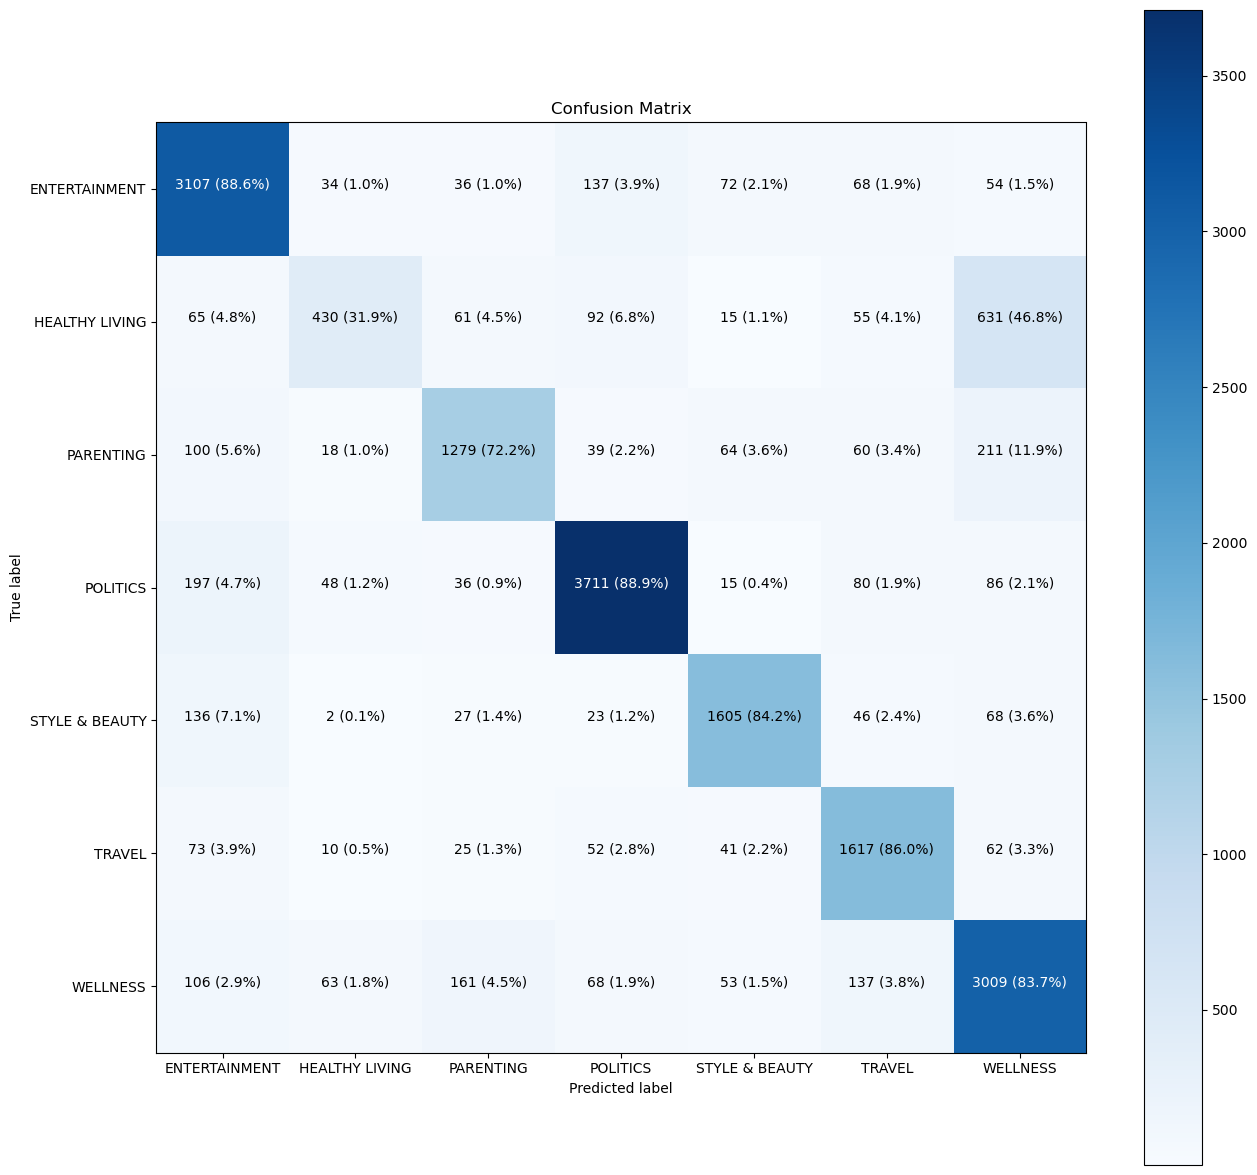

In [158]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Then, the 'random_predictions' function generates and displays predictions on random samples.

In [159]:
random_predictions(model_conv,
                   val_padded_seq,
                   val_labels,
                   tokenizer,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 31ms/step

Sample 1:
Text: love autistic self conversation <OOV> <OOV> <OOV> teacher writer artist <OOV> written terrific book autistic character different one another discus strength challenge stressing <OOV>
True: WELLNESS 
 Predicted: WELLNESS

Sample 2:
Text: will kid listen better <OOV> <OOV> past month rough whole family first grader started brand new school week got
True: PARENTING 
 Predicted: PARENTING

Sample 3:
Text: workout clothes no one actually exercise <OOV> healthy living pretty particular workout gear shes hot shes cold
True: WELLNESS 
 Predicted: WELLNESS

Sample 4:
Text: mad 60 fearful <OOV> nowthe popular sense early 1960s mostly time light celebration came <OOV> end november <OOV> assassination president john f kennedy reality mad men viewer know much complex
True: ENTERTAINMENT 
 Predicted: POLITICS

Sample 5:
Text: voice head <OOV> way practice becoming aware <OOV> prejudice even small one can put u road <OOV> <OOV> juic

**Model: USE**

The following code outlines the construction and training of a text classification model utilizing Google's Universal Sentence Encoder (USE) from TensorFlow Hub. The USE layer, pre-trained on a vast corpus of data, takes sentences as input and encodes them into high-dimensional vectors. This layer is non-trainable, meaning it maintains the pre-trained weights and functions as a feature extractor. The encoded vectors are then passed through a dense layer with 'relu' activation, and finally, an output layer with softmax activation suitable for multiclass classification. The model is compiled with the Adam optimizer and categorical cross-entropy loss.

In [160]:
# import tensorflow_hub as hub

# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [161]:
tf.random.set_seed(42)

# Create model using the Sequential API
model_USE = tf.keras.Sequential([
sentence_encoder_layer, # take in sentences and then encode them into an embedding
layers.Dense(512, activation="relu"),
layers.Dense(num_classes, activation="softmax")
], name="model_USE")

# Compile model
model_USE.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_USE.summary()

Model: "model_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 512)               262656    
                                                                 
 dense_12 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 257,064,071
Trainable params: 266,247
Non-trainable params: 256,797,824
_________________________________________________________________


A ModelCheckpoint callback is set to save only the best model weights, as determined by validation accuracy.

In [162]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path
checkpoint_path = "best_model_USE"

# Create a ModelCheckpoint callback
cc = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_accuracy',
                                      mode='max',
                                      save_best_only=True,
                                      verbose=1)


In [163]:
# Convert lists to numpy arrays
train_sentences_np = np.array(train_sentences)
val_sentences_np = np.array(val_sentences)

The model training is done on numpy arrays of training sentences and labels, with validation data provided and a checkpoint callback ensuring the saving of the best model.

In [164]:
# Train a classifier on top of pretrained embeddings
model_USE_history = model_USE.fit(train_sentences_np,
                              train_labels,
                              epochs=20,
                              validation_data=(val_sentences_np, val_labels),
                              callbacks=[cc])

Epoch 1/20
2274/2274 [==============================] - ETA: 0s - loss: 0.5859 - accuracy: 0.8066
Epoch 1: val_accuracy improved from -inf to 0.81892, saving model to best_model_USE
2274/2274 [==============================] - 51s 21ms/step - loss: 0.5859 - accuracy: 0.8066 - val_loss: 0.5318 - val_accuracy: 0.8189
Epoch 2/20
2271/2274 [============================>.] - ETA: 0s - loss: 0.5104 - accuracy: 0.8274
Epoch 2: val_accuracy improved from 0.81892 to 0.82414, saving model to best_model_USE
2274/2274 [==============================] - 48s 21ms/step - loss: 0.5103 - accuracy: 0.8274 - val_loss: 0.5179 - val_accuracy: 0.8241
Epoch 3/20
2270/2274 [============================>.] - ETA: 0s - loss: 0.4792 - accuracy: 0.8366
Epoch 3: val_accuracy improved from 0.82414 to 0.82590, saving model to best_model_USE
2274/2274 [==============================] - 53s 23ms/step - loss: 0.4792 - accuracy: 0.8366 - val_loss: 0.5093 - val_accuracy: 0.8259
Epoch 4/20
2274/2274 [=====================

The model demonstrating the best validation accuracy is loaded for use in subsequent steps.

In [165]:
from tensorflow.keras.models import load_model

# Load the entire model
model_USE = load_model(checkpoint_path)

In [166]:
model_USE.evaluate(val_sentences_np, val_labels)

569/569 [==============================] - 6s 10ms/step - loss: 0.5097 - accuracy: 0.8304


[0.5097242593765259, 0.8304097056388855]

Post-training, the model's performance is assessed by plotting the history of accuracy and loss over the epochs.

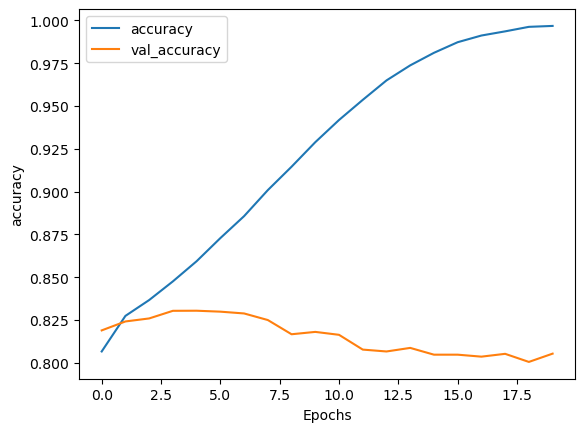

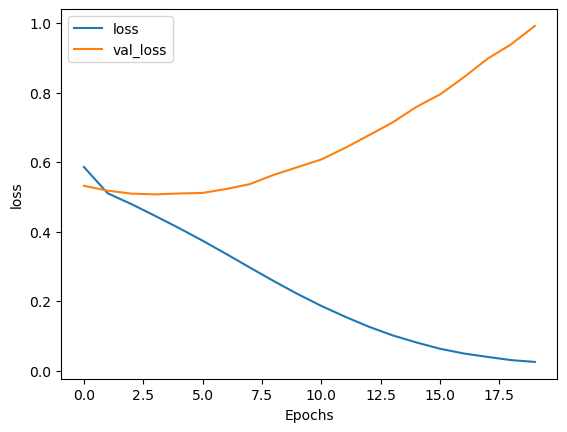

In [167]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_USE_history, 'accuracy')
plot_graphs(model_USE_history, 'loss')

Next, the model is evaluated on the validation set, where probabilities are predicted and converted into class predictions.

In [168]:
# Make predictions with USE TF Hub model
model_USE_pred_probs = model_USE.predict(val_sentences_np)
model_USE_pred_probs[:10]

569/569 [==============================] - 6s 10ms/step


array([[8.8779218e-03, 1.3850304e-05, 1.5193325e-02, 3.8913158e-06,
        9.7450238e-01, 8.6094515e-04, 5.4771727e-04],
       [3.1155342e-04, 3.2127695e-03, 6.3442141e-03, 3.6805699e-04,
        3.1919242e-04, 9.8148215e-01, 7.9620844e-03],
       [1.8269169e-01, 1.2773632e-03, 4.2699832e-02, 4.9983376e-01,
        1.5167501e-03, 2.4214500e-01, 2.9835509e-02],
       [3.3429100e-03, 3.2370834e-05, 1.3186785e-03, 5.6639016e-03,
        9.7464389e-01, 1.3883550e-02, 1.1147294e-03],
       [1.7789463e-06, 5.1152252e-02, 6.0755631e-04, 5.2918749e-05,
        4.8996553e-06, 1.6990343e-02, 9.3119025e-01],
       [2.2480350e-03, 5.3524218e-05, 2.5358004e-05, 9.9748021e-01,
        7.1917671e-06, 1.6142410e-04, 2.4272633e-05],
       [9.9778771e-01, 1.3048151e-04, 1.7200597e-04, 6.8263803e-04,
        4.9839355e-04, 6.8818789e-04, 4.0551247e-05],
       [6.5322340e-02, 1.8606210e-05, 9.6415827e-04, 2.1420567e-06,
        9.3184316e-01, 1.7911318e-04, 1.6704765e-03],
       [9.9908054e-01, 1

In [169]:
# Convert pred probs to classes
model_USE_preds = tf.argmax(model_USE_pred_probs, axis=1)
model_USE_preds

<tf.Tensor: shape=(18185,), dtype=int64, numpy=array([4, 5, 3, ..., 6, 0, 6])>

Various performance metrics such as accuracy, precision, recall, and the F1-score are calculated for the model.

In [170]:
# Calculate model performance metrics
model_USE_results = calculate_results(val_labels_le, model_USE_preds)
model_USE_results

{'accuracy': 83.04096783062964,
 'precision': 0.8316833527026894,
 'recall': 0.8304096783062964,
 'f1': 0.8243462258136254}

A comparison of the baseline and USE models is then performed based on these metrics.

In [171]:
# Compare model to baseline
compare_baseline_to_new_results(baseline_results, model_1LSTM_results)

Baseline accuracy: 71.52, New accuracy: 82.17, Difference: 10.65
Baseline precision: 0.80, New precision: 0.82, Difference: 0.02
Baseline recall: 0.72, New recall: 0.82, Difference: 0.11
Baseline f1: 0.67, New f1: 0.82, Difference: 0.15


In [172]:
y_true = np.argmax(val_labels, axis=1).tolist()  # Convert one-hot encoded labels to class labels
preds = model_USE.predict(val_sentences_np)
y_probs = preds.tolist()  # Store the prediction probabilities
y_preds = np.argmax(preds, axis=1).tolist()  # Convert probabilities to class predictions

569/569 [==============================] - 6s 10ms/step


A confusion matrix is created to offer a visual perspective of the classification model's performance, which is further refined for readability using a custom function.

In [173]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[3109,   32,   73,  118,   70,   58,   48],
       [  45,  483,   68,   73,   14,   33,  633],
       [  56,   23, 1392,   46,   28,   31,  195],
       [ 150,   35,   33, 3803,    8,   62,   82],
       [ 158,    7,   40,   24, 1531,   54,   93],
       [  53,   16,   24,   34,   24, 1640,   89],
       [  54,   49,  176,   49,   32,   94, 3143]])

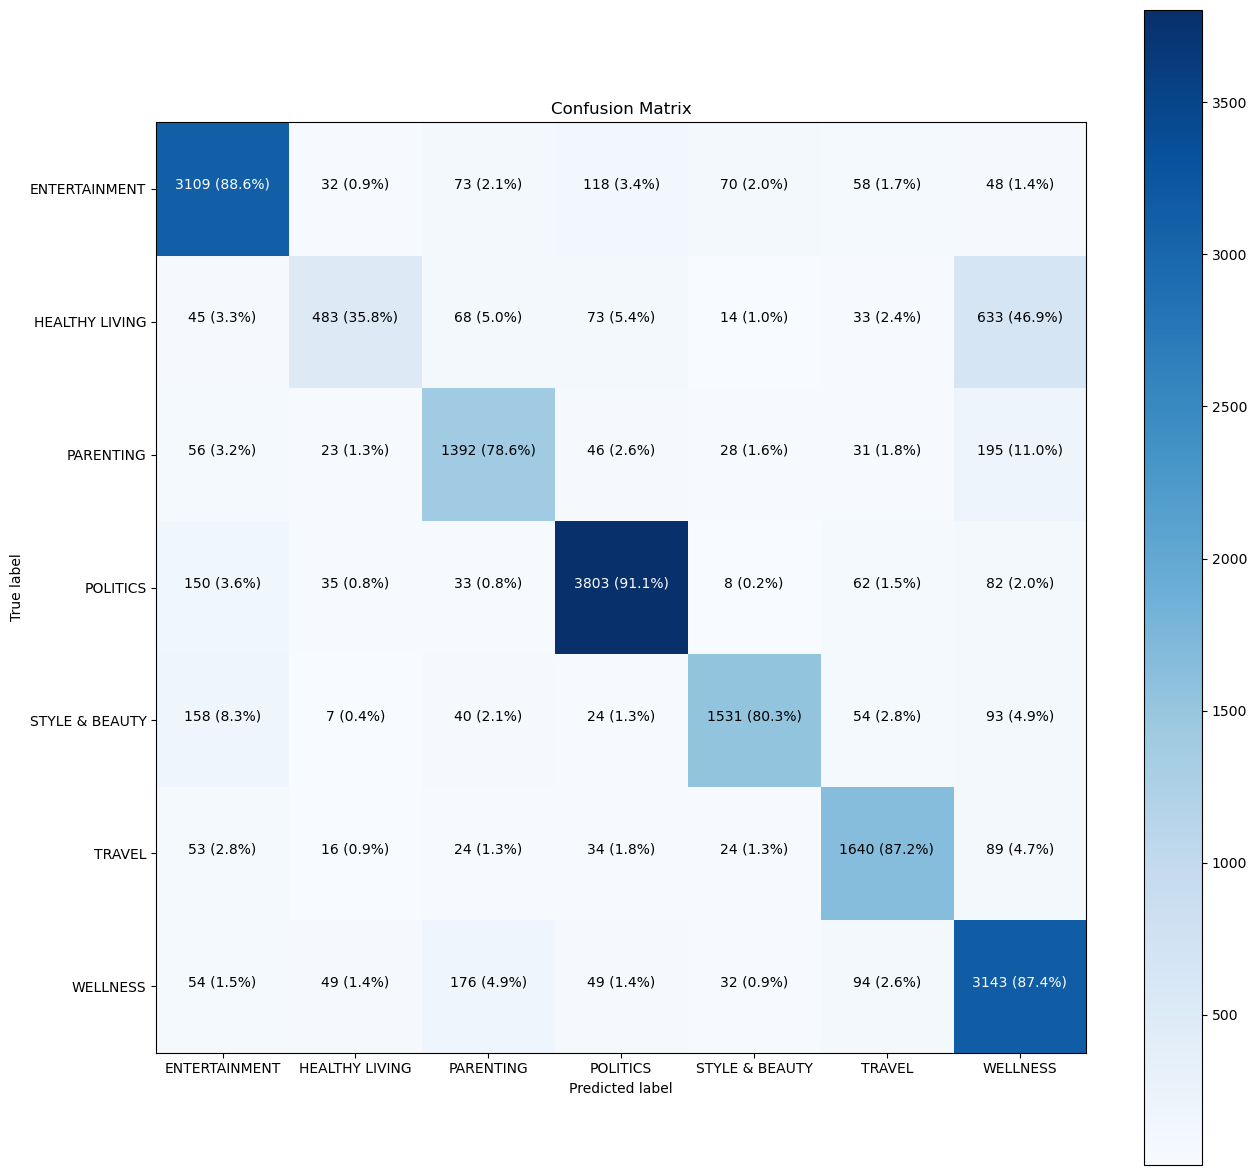

In [174]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The function '`random_predictions`' generates and displays predictions on random samples specifafor model USE.

In [176]:
def random_predictions(model, val_padded_seq, val_labels, num_samples=5, class_names=None):
    # Check if it's binary or multi-class classification
    num_classes = val_labels.shape[1] if len(val_labels.shape) > 1 else 2
    is_binary_classification = num_classes == 2

    # Getting indices of the random samples
    random_indices = np.random.choice(np.arange(len(val_padded_seq)), size=num_samples, replace=False)

    # Selecting the random samples
    random_X_samples = val_padded_seq[random_indices]
    random_y_samples = val_labels[random_indices]

    # Making predictions on the random samples
    y_pred_probs = model.predict(random_X_samples)

    if is_binary_classification:
        y_pred = np.squeeze(np.round(y_pred_probs).astype(int))
    else:
        y_pred = np.argmax(y_pred_probs, axis=1)

    # Print the actual and predicted labels
    for i in range(num_samples):
        text = random_X_samples[i]
        true_label = np.argmax(random_y_samples[i]) if not is_binary_classification else np.squeeze(random_y_samples[i])
        predicted_label = y_pred[i]

        # If class names are provided, use them for printing
        if class_names is not None:
            true_label_name = class_names[true_label]
            predicted_label_name = class_names[predicted_label]
        else:
            true_label_name = true_label
            predicted_label_name = predicted_label

        # Determine the color of the text (green for correct, red for incorrect)
        text_color = Fore.GREEN if true_label == predicted_label else Fore.RED

        print(f"\nSample {i + 1}:")
        print(f"Text: {text}")
        print(text_color + f"True: {true_label_name} \n Predicted: {predicted_label_name}" + Style.RESET_ALL)

In [177]:
random_predictions(model_USE,
                   val_sentences_np,
                   val_labels,
                   num_samples=20,
                   class_names=class_names)

1/1 [==============================] - 0s 27ms/step

Sample 1:
Text: donald trump jacked campaign trump tower rent somebody else paying itoffice rent soared july trump campaign began accepting donor contribution
True: POLITICS 
 Predicted: POLITICS

Sample 2:
Text: unbelievably cheap paradise earthcheck list 12 shockingly affordable paradise can live peanut though youll probably packed door number seven
True: TRAVEL 
 Predicted: TRAVEL

Sample 3:
Text: another belated updatesecond long thursday made longer google map directed bob road ended creek steep bank mention already 34 mile day two mile hotel not darn creek
True: WELLNESS 
 Predicted: TRAVEL

Sample 4:
Text: 4 way leave lover strangersyou finite amount time energy really dont want spend much situation crush light dont need 50 way speak just need one work
True: HEALTHY LIVING 
 Predicted: WELLNESS

Sample 5:
Text: wouldbe immigrant lost limbo supreme court revers travel ban ordermondays scotus ruling led confusion anxiety among i

**Comparing all models**

The following section compares and visualizes the performance of various models. Initially, the evaluation results from each model are compiled into a DataFrame for comparison. Metrics such as F1-score are used to sort the models in terms of performance.

In [178]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "Simple Dense": model_dense_results,
                                  "LSTM": model_1LSTM_results,
                                  "Bidirectional LSTM": model_lstm_results,
                                  "GRU": model_GRU_results,
                                  "Bidirectional GRU": model_bi_GRU_results,
                                  "Conv1D": model_conv_results,
                                  "USE": model_USE_results,
                                 })

all_model_results = all_model_results.transpose()

# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.715205,0.799374,0.715205,0.672891
Simple Dense,0.818257,0.817639,0.818257,0.814439
LSTM,0.821721,0.819484,0.821721,0.817971
Bidirectional LSTM,0.826230,0.826421,0.826230,0.823005
GRU,0.826725,0.826463,0.826725,0.822764
Bidirectional GRU,0.828430,0.827318,0.828430,0.825852
Conv1D,0.811548,0.810069,0.811548,0.803985
USE,0.830410,0.831683,0.830410,0.824346


The evaluation of various machine learning models on the dataset reveals different levels of performance, measured in terms of accuracy, precision, recall, and F1-score. The Universal Sentence Encoder (USE) model outperforms the others with an accuracy of 83.04% and an F1-score of 0.824, indicating superior classification ability. LSTM, Bidirectional LSTM, GRU, and Bidirectional GRU models also demonstrate commendable performance, delivering accuracy-scores between 0.81 and 0.826. The baseline and Conv1D models, however, show relatively lower effectiveness with the lowest F1-scores of 0.672 and 0.803 respectively. This comparative analysis can guide future model selection for similar classification tasks.

In [179]:
all_model_results_sorted = all_model_results.sort_values("f1", ascending=False)
all_model_results_sorted

,accuracy,precision,recall,f1
Bidirectional GRU,0.828430,0.827318,0.828430,0.825852
USE,0.830410,0.831683,0.830410,0.824346
Bidirectional LSTM,0.826230,0.826421,0.826230,0.823005
GRU,0.826725,0.826463,0.826725,0.822764
LSTM,0.821721,0.819484,0.821721,0.817971
Simple Dense,0.818257,0.817639,0.818257,0.814439
Conv1D,0.811548,0.810069,0.811548,0.803985
baseline,0.715205,0.799374,0.715205,0.672891


In terms of the F1-score, which is the harmonic mean of precision and recall, the Bidirectional GRU model comes out on top with the highest F1-score of 0.825, suggesting it is the most balanced model in terms of precision and recall for this particular classification task. The USE model follows closely with an F1-score of 0.824. The GRU, Bidirectional LSTM, LSTM, and Simple Dense models exhibit competitive performance with F1-scores ranging from 0.814 to 0.822. The Conv1D model delivers an F1-score of 0.803, while the baseline model scores the lowest F1-score of 0.672. Therefore, the Bidirectional GRU model provides the most effective performance according to the F1-score metric.

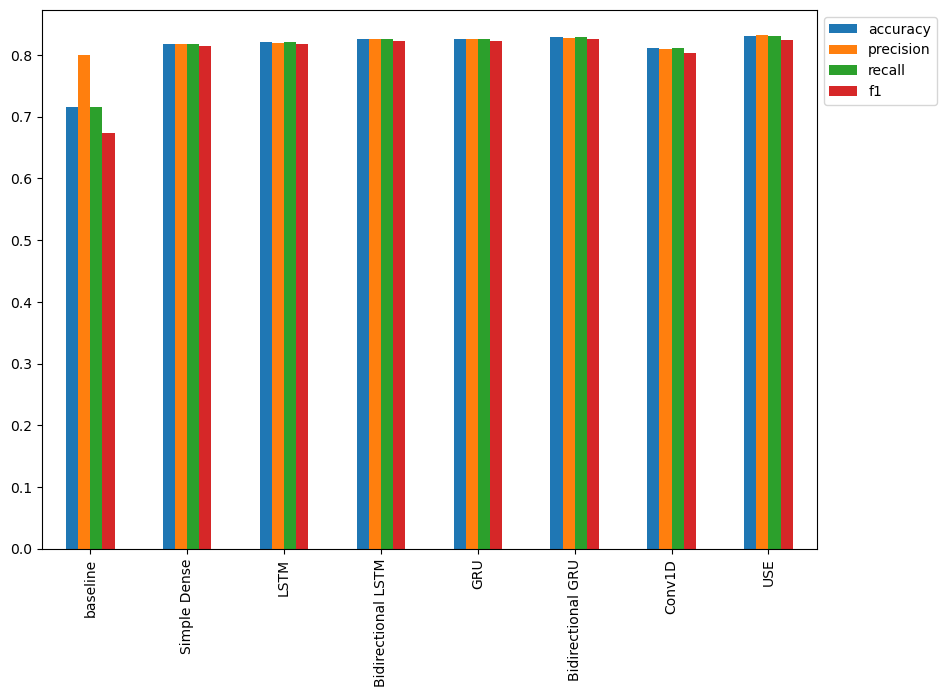

In [180]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

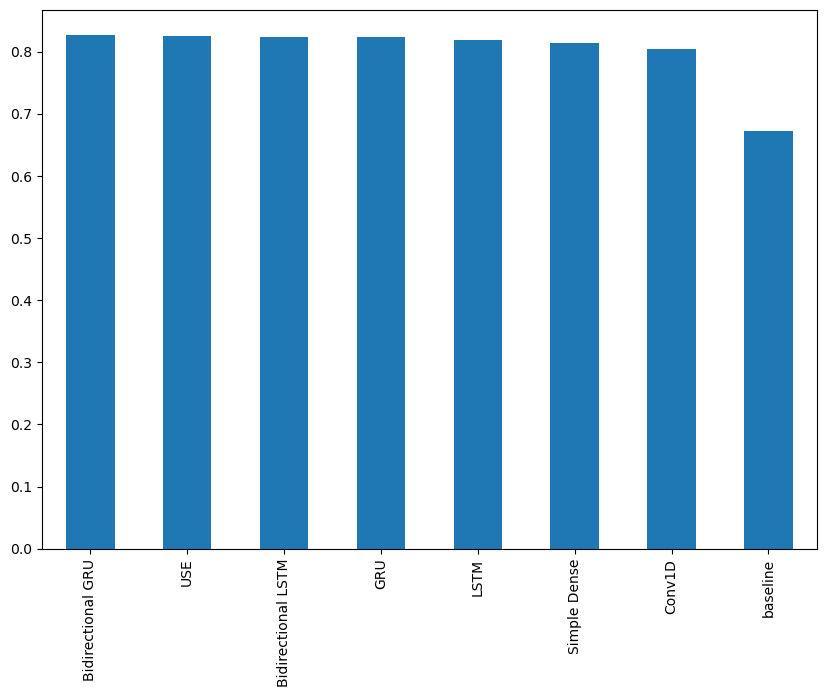

In [181]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

**Evaluation Metrics**

Moving forward, we will deploy the Model USE model for further analysis.

In [206]:
y_true = np.argmax(val_labels, axis=1).tolist()  # Convert one-hot encoded labels to class labels
preds = model_USE.predict(val_sentences)
y_probs = preds.tolist()  # Store the prediction probabilities
y_preds = np.argmax(preds, axis=1).tolist()  # Convert probabilities to class predictions

569/569 [==============================] - 6s 11ms/step


In [207]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

report = classification_report(y_true, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      3508
           1       0.75      0.36      0.48      1349
           2       0.77      0.79      0.78      1771
           3       0.92      0.91      0.91      4173
           4       0.90      0.80      0.85      1907
           5       0.83      0.87      0.85      1880
           6       0.73      0.87      0.80      3597

    accuracy                           0.83     18185
   macro avg       0.82      0.78      0.79     18185
weighted avg       0.83      0.83      0.82     18185



**Make Prediction on Text from Wild**

In [201]:
# Turn Text into string
textx = "The newly elected president promises a greener future for our nation."

In [186]:
# Turn Text into string
textx2 =  "News and updates about the world of entertainment, including movies, music, celebrities, and pop culture."

In [203]:
# Turn Text into string
textx3 = "Discovering the hidden gems of Rome was an unforgettable adventure."

The 'predict_on_sentence' function is used to make predictions on unseen sentences, displaying the predicted class and its corresponding probability.

In [188]:
def predict_on_sentence(model, sentence, class_names):
    """
    Uses model to make a prediction on sentence.

    Returns the sentence, the predicted labels and the prediction probabilities.
    """
    pred_prob = model.predict([sentence])
    pred_label = np.argmax(pred_prob[0])  # Getting the index of the max probability

    # Get the label name of the predicted class
    pred_label_str = class_names[pred_label]
    # Get the probability of the predicted class
    pred_prob_str = pred_prob[0][pred_label]

    print(f"Prediction: {pred_label_str}")  # Print the predicted label
    print(f"Prediction probability: {pred_prob_str}")    # Print the prediction probability
    print(f"Text:\n{sentence}")

In [202]:
# Make a prediction on text from the wild
predict_on_sentence(model=model_USE, 
                    sentence=textx,
                    class_names=class_names)

1/1 [==============================] - 0s 37ms/step
Prediction: POLITICS
Prediction probability: 0.976310133934021
Text:
The newly elected president promises a greener future for our nation.


In [200]:
# Make a prediction on text from the wild
predict_on_sentence(model=model_USE, 
                    sentence=textx2,
                    class_names=class_names)

1/1 [==============================] - 0s 53ms/step
Prediction: ENTERTAINMENT
Prediction probability: 0.9731371998786926
Text:
News and updates about the world of entertainment, including movies, music, celebrities, and pop culture.


In [204]:
# Make a prediction on text from the wild
predict_on_sentence(model=model_USE, 
                    sentence=textx3,
                    class_names=class_names)

1/1 [==============================] - 0s 38ms/step
Prediction: TRAVEL
Prediction probability: 0.9952974915504456
Text:
Discovering the hidden gems of Rome was an unforgettable adventure.


**Most Wrong Predictions**

 The 'Most Wrong Predictions' code segment below allows for a deeper understanding of model errors by identifying and analyzing predictions that deviate most from actual values, assisting in pinpointing model weaknesses and potential areas of improvement. Here, a DataFrame is created with the validation sentences and predictions of the best-performing model, which helps to identify the most incorrect predictions, both false positives and negatives.

In [208]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({
#     "text": val_padded_seq,
    "text": val_sentences_np,
    "target": [class_names[np.argmax(arr)] for arr in val_labels],
    "target_label": val_labels_le,  # add label-encoded target
    "pred": [class_names[np.argmax(arr)] for arr in np.array(y_preds)],  # convert to numpy array
    "pred_label": [np.argmax(arr) for arr in np.array(y_preds)],  # add label-encoded prediction
    "pred_prob": [np.max(arr) for arr in np.squeeze(y_probs)]  # adjust y_probs if necessary
})

val_df.head()

,text,target,target_label,pred,pred_label,pred_prob
0,crystal renn blonde hair hit town photo pollsee just crystal modeling work dress lent enough high drama hair makeup brow took,STYLE & BEAUTY,4,ENTERTAINMENT,0,0.974502
1,5 truly epic swimming pool photosas think booking spring vacation year better way truly unwind relax basking pool listen gentle lapping wave,TRAVEL,5,ENTERTAINMENT,0,0.981482
2,10 america best ballpark opening dayopening day sunday march 31 houston astros make american league debut texas ranger 8 pm,TRAVEL,5,ENTERTAINMENT,0,0.499834
3,wolford creates custom headband michelle obamafirst lady fave michelle obamas tress stay sleek stylish literally jet white house reception,STYLE & BEAUTY,4,ENTERTAINMENT,0,0.974644
4,10 compound exercise quick fullbody workouti huge fan compound movement work many muscle group one exercise since human move plane motion wise train body multiple plane multijoint exercise can max...,HEALTHY LIVING,1,ENTERTAINMENT,0,0.931190


In [209]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,target_label,pred,pred_label,pred_prob
6050,dont tell restaurant local eat florencewhen come traveling italy possible find lovely meal almost anywhere posh hotel dining room table piazza hole wall whose um ambience leaf something desired,TRAVEL,5,ENTERTAINMENT,0,0.999996
12102,forever 21 black friday 2013 sale even affordable usualwant sure check huffpost style twitter facebook tumblr pinterest instagram quilted,STYLE & BEAUTY,4,ENTERTAINMENT,0,0.999987
12504,10 best resaturants grand caymangrand cayman reputation best food caribbean roadside bbq beachfront fish shack international superstar chef island covered here list best right now,TRAVEL,5,ENTERTAINMENT,0,0.999985
9618,rounding south africa best highend waywe enviable job checking country best safari lodge signature game reserve countryside boutique hotel course exuberant wildlife here best best,TRAVEL,5,ENTERTAINMENT,0,0.999983
1486,7 bucket list sight didnt know cruise toyou can get world historic significant place including lot unesco world heritage site traditional cruise port longer landbased extension,TRAVEL,5,ENTERTAINMENT,0,0.999978
9870,5 thing must london traveling englandlondon tourist paradise owing several iconic attraction offerthereforeit make sense london,TRAVEL,5,ENTERTAINMENT,0,0.999978
15448,10 great ocean view around world photosregardless budget location taste weve found perfect room view,TRAVEL,5,ENTERTAINMENT,0,0.999975
15201,nordstrom ups fashion game popup shop featuring proenza schouler rodartewant sure check huffpost style twitter facebook tumblr pinterest instagram,STYLE & BEAUTY,4,ENTERTAINMENT,0,0.999971
14374,david beckhams modeling career go new hm ad photossee beckhams hm ad want sure check huffpost style twitter facebook tumblr pinterest,STYLE & BEAUTY,4,ENTERTAINMENT,0,0.999970
2333,mediterranean 10 best hidden beacheswith picturesque village laidback lifestyle worldfamous cuisine no wonder mediterranean goto destination summertime traveler year here list top hidden beach tuc...,TRAVEL,5,ENTERTAINMENT,0,0.999967


In [210]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, target_label, pred, pred_label, prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: TRAVEL, Pred: ENTERTAINMENT, Prob: 0.9999958276748657
Text:
dont tell restaurant local eat florencewhen come traveling italy possible find lovely meal almost anywhere posh hotel dining room table piazza hole wall whose um ambience leaf something desired

----

Target: STYLE & BEAUTY, Pred: ENTERTAINMENT, Prob: 0.999987006187439
Text:
forever 21 black friday 2013 sale even affordable usualwant sure check huffpost style twitter facebook tumblr pinterest instagram quilted

----

Target: TRAVEL, Pred: ENTERTAINMENT, Prob: 0.9999847412109375
Text:
10 best resaturants grand caymangrand cayman reputation best food caribbean roadside bbq beachfront fish shack international superstar chef island covered here list best right now

----

Target: TRAVEL, Pred: ENTERTAINMENT, Prob: 0.9999828338623047
Text:
rounding south africa best highend waywe enviable job checking country best safari lodge signature game reserve countryside boutique hotel course exuberant wildlife here best best

----

T

In [211]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, target_label, pred, pred_label, prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: WELLNESS, Pred: ENTERTAINMENT, Prob: 0.28007370233535767
Text:
da de los muertoswere concerned getting ahead keeping jones day sometimes forget one day jones wont matter anymore thats day need prepare

----

Target: WELLNESS, Pred: ENTERTAINMENT, Prob: 0.2759370803833008
Text:
winter 5 thing learned downsizing lives2 coooolllllldddd idealized worker among worker taking metro every day downsized one

----

Target: WELLNESS, Pred: ENTERTAINMENT, Prob: 0.2708091735839844
Text:
20 thing probably didnt know eyesthink eye house two room there foyer back room foyer aka anterior chamber

----

Target: WELLNESS, Pred: ENTERTAINMENT, Prob: 0.2675403952598572
Text:
snow day code conductim convinced reason many people get stiff shoveling go sitting couch pjs

----

Target: STYLE & BEAUTY, Pred: ENTERTAINMENT, Prob: 0.26149842143058777
Text:
broke new blackby time 24 owed nearly 35000 eight credit card staying top payment like second fulltime job

----

Target: STYLE & BEAUTY, Pred: ENTERTA

**The speed/score tradeoff**

The speed-performance trade-off code below helps quantify and visualize the balance between a model's prediction accuracy (performance) and the computational resources required (time taken for predictions), which is critical in optimizing real-world applications.

In [212]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.

  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_padded_seq) # find prediction time per sample
  return total_time, time_per_pred

In [213]:
# Calculate model prediction times
model_total_pred_time, model_time_per_pred = pred_timer(model_USE, val_sentences_np)
model_total_pred_time, model_time_per_pred

569/569 [==============================] - 6s 10ms/step


(10.295227012999021, 0.0005661384114929349)

In [214]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences_np)
baseline_total_pred_time, baseline_time_per_pred

(0.5146036820005975, 2.8298250316227523e-05)

The time per prediction and F1-score for each model are plotted on a scatter plot to visualize this trade-off.

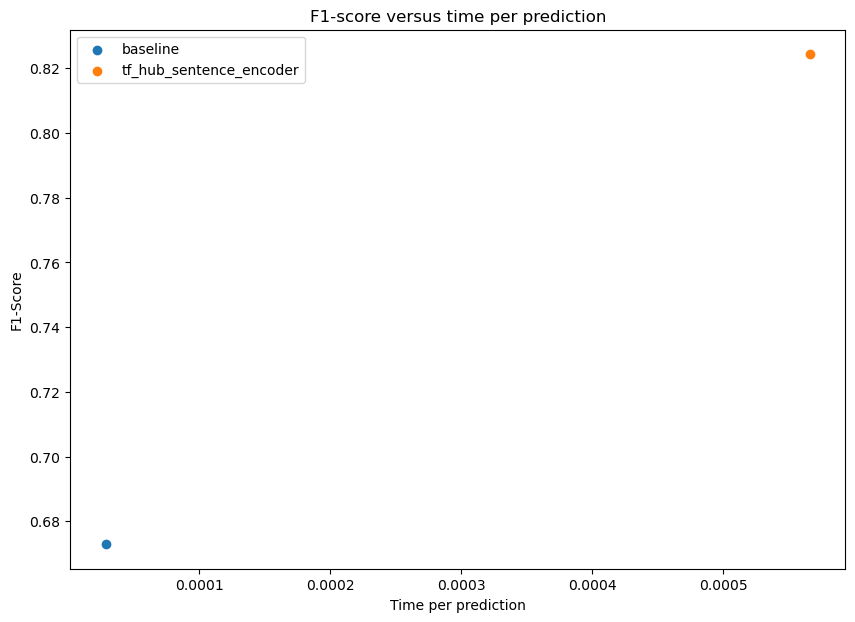

In [215]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_time_per_pred, model_USE_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/08-ideal-performance-speed-of-pred-tradeoff-highlighted.png)
*Ideal position for speed and performance tradeoff model (fast predictions with great results).*

As can be seen, the best-performing model, while significantly improving the F1-score, takes considerably more time per prediction, highlighting a crucial consideration for machine learning applications: balancing model performance and prediction speed.

**Improving model performance: Ensemble Models**

Ensemble methods are a cornerstone of machine learning where multiple models are trained and their predictions are combined, typically leading to a more robust and accurate result compared to a single model. They reduce both bias and variance, provide a way to handle large datasets, and improve generalizability and robustness over a single estimator.

In this project, an ensemble of three models (LSTM, Bidirectional GRU, and GRU) is created. The prediction probabilities of these models are added together and the average is calculated (by dividing by 3). The class (label) with the highest mean probability is then selected as the final ensemble prediction. This effectively votes on the most likely class based on the individual model's predictions, hence capitalizing on their collective learning.

In [216]:
# Get mean pred probs for 3 models
combined_pred_probs = model_1LSTM_pred_probs + model_bi_GRU_pred_probs + model_GRU_pred_probs
combined_preds = tf.argmax(combined_pred_probs/3, axis=1) # average and get class with highest probability
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=int64, numpy=array([4, 5, 0, 4, 6, 3, 3, 4, 0, 6, 6, 5, 5, 5, 1, 3, 0, 0, 5, 3])>

The following code evaluates the ensemble model's performance, adds these results to a DataFrame for comparison with other models, and plots the F1 scores of all models. The code evaluates the ensemble model's performance, adds these results to a DataFrame for comparison with other models, and plots the F1 scores of all models.

In [217]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels_le, combined_preds)
ensemble_results

{'accuracy': 83.58537255980202,
 'precision': 0.8346860238996082,
 'recall': 0.8358537255980203,
 'f1': 0.8319866144306504}

In [218]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_models"] = ensemble_results

In [220]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_models"]["accuracy"] = all_model_results.loc["ensemble_models"]["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.715205,0.799374,0.715205,0.672891
Simple Dense,0.818257,0.817639,0.818257,0.814439
LSTM,0.821721,0.819484,0.821721,0.817971
Bidirectional LSTM,0.826230,0.826421,0.826230,0.823005
GRU,0.826725,0.826463,0.826725,0.822764
Bidirectional GRU,0.828430,0.827318,0.828430,0.825852
Conv1D,0.811548,0.810069,0.811548,0.803985
USE,0.830410,0.831683,0.830410,0.824346
ensemble_models,0.835854,0.834686,0.835854,0.831987


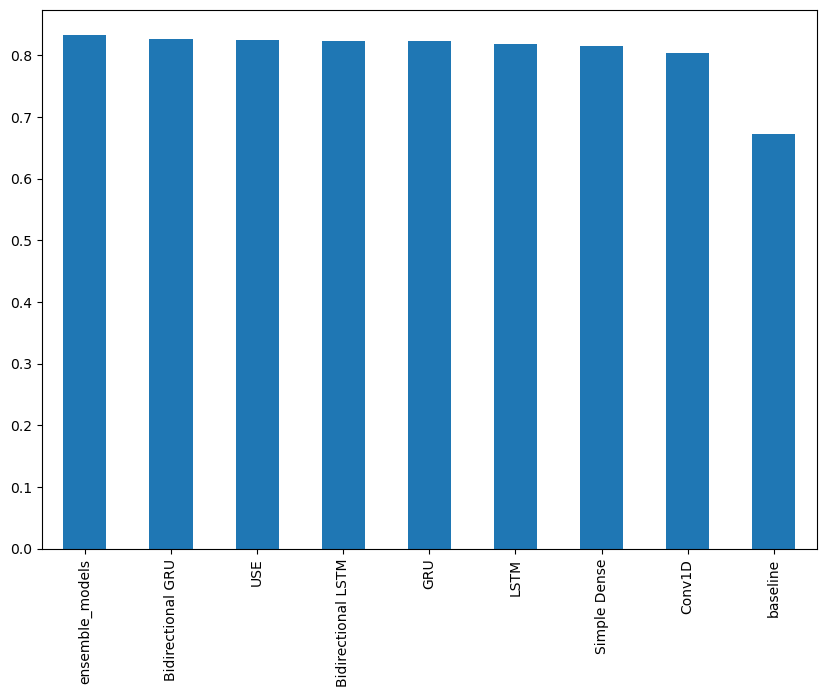

In [221]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

The comparative performance analysis reveals the true power of ensemble modeling, wherein multiple models are combined to deliver even more accurate results. Surpassing the performance of the individually highly effective Bidirectional GRU and USE models, the ensemble approach achieved an accuracy of 83.58% and an F1-score of 0.831, becoming the top performer in this classification task. This exemplifies the potential of ensemble models in effectively harnessing the strengths of individual models while mitigating their weaknesses, leading to overall enhanced performance in complex classification tasks.